# Libraries

In [138]:
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Read Parquet Files

## Folders

In [139]:
folder_path = "18_ParquetFiles_APIbaseGov"

## List all parquet files

In [140]:
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]
print(parquet_files)

['2015.parquet', '2016.parquet', '2017.parquet', '2018.parquet', '2019.parquet', '2020.parquet', '2021.parquet', '2022.parquet', '2023.parquet', '2024.parquet']


## Dictionary with all parquet files

In [141]:
dataframes = {}
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path)
    dataframes[file] = df

## Verify uploaded files

In [142]:
print("Arquivos carregados:")
for i, name in enumerate(dataframes.keys(), start=1):
    print(f"{i}. {name}")

Arquivos carregados:
1. 2015.parquet
2. 2016.parquet
3. 2017.parquet
4. 2018.parquet
5. 2019.parquet
6. 2020.parquet
7. 2021.parquet
8. 2022.parquet
9. 2023.parquet
10. 2024.parquet


# Aggregate parquet files

In [143]:
df_list = []

for filename, df in dataframes.items():
    df_list.append(df)

df_geral = pd.concat(df_list, ignore_index=True)

# Basic Analysis

## Number of rows

In [144]:
print(f"\nNúmero total de linhas: {df_geral.shape[0]}")


Número total de linhas: 1575991


## First 20 rows

In [145]:
pd.set_option('display.max_columns', None) 
display(df_geral.head(3))

,idcontrato,nAnuncio,TipoAnuncio,idINCM,tipoContrato,idprocedimento,tipoprocedimento,objectoContrato,descContrato,adjudicante,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao,ProcedimentoCentralizado,numAcordoQuadro,DescrAcordoQuadro,precoBaseProcedimento,dataDecisaoAdjudicacao,dataFechoContrato,PrecoTotalEfetivo,regime,justifNReducEscrContrato,tipoFimContrato,CritMateriais,concorrentes,linkPecasProc,Observacoes,ContratEcologico,Ano,fundamentAjusteDireto
0,26533,,,,None,26474,Ajuste Direto Regime Geral,Certificação do Inventário Patrimonial da Simtejo,,"[505908093 - SIMTEJO – Saneamento Integrado dos Municípios do Tejo e Trancão, SA]",[504193279 - PRICEWATERHOUSECOOPERS],10/02/2009,,6000.00,None,28,None,Não Preenchido,NÃ£o,NULL,NULL,0.0,,10/09/2015,6000.00,Código dos Contratos Públicos (DL 18/2008),None,"O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil",NÃ£o,None,,,NÃ£o,2015,
1,27703,,,,None,27595,Ajuste Direto Regime Geral,Aquisição de Material Eléctrico,,[501206639 - Município de Mourão],"[505001764 - Electro Requetim – Distribuição de Material Eléctrico, S.A]",30/10/2008,,36529.96,None,15,None,Não Preenchido,NÃ£o,NULL,NULL,0.0,,24/09/2015,36529.96,Código dos Contratos Públicos (DL 18/2008),None,"O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil",NÃ£o,None,,,NÃ£o,2015,
2,27718,,,,None,27608,Ajuste Direto Regime Geral,Prestação de serviços de espectáculos musicais nas Festas de N. Sra Candeias,,[501206639 - Município de Mourão],"[503547271 - Corval Som – Produções Audiovisuais, Ld.ª]",29/01/2009,,45500.00,None,5,None,Não Preenchido,NÃ£o,NULL,NULL,0.0,,24/09/2015,45500.00,Código dos Contratos Públicos (DL 18/2008),None,"O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil",NÃ£o,None,,,NÃ£o,2015,


## Squema and features

In [146]:
df_geral.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575991 entries, 0 to 1575990
Data columns (total 35 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   idcontrato                1575991 non-null  int64  
 1   nAnuncio                  1575991 non-null  object 
 2   TipoAnuncio               1575991 non-null  object 
 3   idINCM                    1575991 non-null  object 
 4   tipoContrato              1575963 non-null  object 
 5   idprocedimento            1575991 non-null  int64  
 6   tipoprocedimento          1575991 non-null  object 
 7   objectoContrato           1575991 non-null  object 
 8   descContrato              1575991 non-null  object 
 9   adjudicante               1575973 non-null  object 
 10  adjudicatarios            1574042 non-null  object 
 11  dataPublicacao            1575991 non-null  object 
 12  dataCelebracaoContrato    1575991 non-null  object 
 13  precoContratual           1

In [147]:
print(df_geral.columns.tolist())

['idcontrato', 'nAnuncio', 'TipoAnuncio', 'idINCM', 'tipoContrato', 'idprocedimento', 'tipoprocedimento', 'objectoContrato', 'descContrato', 'adjudicante', 'adjudicatarios', 'dataPublicacao', 'dataCelebracaoContrato', 'precoContratual', 'cpv', 'prazoExecucao', 'localExecucao', 'fundamentacao', 'ProcedimentoCentralizado', 'numAcordoQuadro', 'DescrAcordoQuadro', 'precoBaseProcedimento', 'dataDecisaoAdjudicacao', 'dataFechoContrato', 'PrecoTotalEfetivo', 'regime', 'justifNReducEscrContrato', 'tipoFimContrato', 'CritMateriais', 'concorrentes', 'linkPecasProc', 'Observacoes', 'ContratEcologico', 'Ano', 'fundamentAjusteDireto']


# Functions

## Function to print the top xx values 

In [148]:
def print_top_n(df, column_name, top_n=20):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return
    
    # Calculate the top 'n' most frequent values
    top_n_values = df[column_name].value_counts().head(top_n)
    
    # Print the top 'n' values
    print(f"Top {top_n} most frequent values for '{column_name}':")
    print(top_n_values)

## Function to print the top xx values in a list

In [149]:
def print_top_n_list(df, column_name, top_n=20):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Explode the lists into separate rows
    exploded = df[column_name].explode()
    
    # Calculate the top 'n' most frequent individual values
    top_n_values = exploded.value_counts().head(top_n)

    # Print the results
    print(f"Top {top_n} most frequent values for '{column_name}':")
    print(top_n_values)

## Function to print de bottom xx values

In [150]:
def print_bottom_n(df, column_name, bottom_n=20):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Calculate value counts and get the bottom 'n' values
    bottom_n_values = df[column_name].value_counts().sort_values(ascending=True).head(bottom_n)

    # Print the bottom 'n' values
    print(f"Bottom {bottom_n} least frequent values for '{column_name}':")
    print(bottom_n_values)

## Function to print de bottom xx values from list

In [151]:
def print_bottom_n_list(df, column_name, bottom_n=20):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Explode the lists into separate rows
    exploded = df[column_name].explode()

    # Calculate value counts and get the bottom 'n' values
    bottom_n_values = exploded.value_counts(ascending=True).head(bottom_n)

    # Print the results
    print(f"Bottom {bottom_n} least frequent values for '{column_name}':")
    print(bottom_n_values)

## Function to plot top xx values

In [152]:
def plot_top_n(df, column_name, top_n=20):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return
    
    top_n_values = df[column_name].value_counts().head(top_n)
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=top_n_values.values, 
        y=top_n_values.index, 
        palette='viridis', 
        hue=top_n_values.index, 
        legend=False
    )
    
    for i, value in enumerate(top_n_values.values):
        ax.text(value + max(top_n_values.values) * 0.01, i, str(value), va='center')
    
    plt.title(f"Top {top_n} Most Frequent Values for '{column_name}'", fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.tight_layout()
    plt.show()

## Function to plot top xx values from list

In [153]:
def plot_top_n_list(df, column_name, top_n=20):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Explode the column if it contains lists
    exploded = df[column_name].explode()

    # Get the top 'n' most frequent values
    top_n_values = exploded.value_counts().head(top_n)

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=top_n_values.values,
        y=top_n_values.index,
        palette='viridis',
        hue=top_n_values.index,
        legend=False
    )

    # Add value labels on the bars
    for i, value in enumerate(top_n_values.values):
        ax.text(value + max(top_n_values.values) * 0.01, i, str(value), va='center')

    plt.title(f"Top {top_n} Most Frequent Values for '{column_name}'", fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.tight_layout()
    plt.show()


## Function to plot top xx values (numeric values)

In [154]:
def plot_top_n_numeric(df, column_name, top_n=20):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Calculate the top 'n' most frequent values
    top_n_values = df[column_name].value_counts().head(top_n)

    # Convert index to string to ensure proper y-axis labeling
    y_labels = top_n_values.index.astype(str)

    # Plotting (horizontal bars)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_n_values.values, y=y_labels, palette='viridis', hue=y_labels, legend=False)

    # Adding labels and title
    plt.title(f"Top {top_n} Most Frequent Values for '{column_name}'", fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.tight_layout()
    plt.show()

## Function to count null and empty values

In [155]:
def count_null_and_empty(df, column_name):
    total = len(df)

    # Count NaN (null) values
    null_count = df[column_name].isna().sum()
    null_pct = (null_count / total) * 100

    # Count empty string values (after stripping whitespace)
    empty_count = (df[column_name].astype(str).str.strip() == '').sum()
    empty_pct = (empty_count / total) * 100

    # Print results
    print(f"Null (NaN) values: {null_count} ({null_pct:.2f}%)")
    print(f"Empty string values: {empty_count} ({empty_pct:.2f}%)")

## Function to Plot feature by year

In [156]:
def plot_per_year(column_values,column_name):
    # Create DataFrame from the series
    df_year_counts = pd.DataFrame({
        'Year': column_values.index.astype(str),
        'Count': column_values.values
    })

    # Create the plot
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(data=df_year_counts, x='Year', y='Count', hue='Year', palette='viridis', legend=False)

    # Annotate each bar with its height (publication count)
    for p in barplot.patches:
        height = int(p.get_height())
        barplot.annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='bottom', 
                         fontsize=9, color='black')

    # Add labels and title
    plt.xlabel(f"Year of '{column_name}' ", fontsize=12)
    plt.ylabel(f"Number of '{column_name}' ", fontsize=12)
    plt.title(f"Number of '{column_name}' per Year", fontsize=14)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()


## Function to plot values by interval

In [157]:
def plot_horizontal_bar(count_series, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(count_series.index.astype(str), count_series.values, color='skyblue')

    # Add annotations to each bar
    for bar in bars:
        width = bar.get_width()
        plt.text(width + max(count_series.values) * 0.01, bar.get_y() + bar.get_height() / 2,
                 f'{int(width)}', va='center', fontsize=9)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# idcontrato (int64)

In [158]:
count_null_and_empty(df_geral, 'idcontrato')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [159]:
print(df_geral['idcontrato'].head(10))

0     26533
1     27703
2     27718
3     46632
4     49901
5     49954
6     52051
7     60239
8     60590
9    774628
Name: idcontrato, dtype: int64


In [160]:
print(df['idcontrato'].tail(10))

219646    11473350
219647    11473388
219648    11473390
219649    11473406
219650    11473421
219651    11473425
219652    11473438
219653    11473462
219654    11473477
219655    11473484
Name: idcontrato, dtype: int64


In [161]:
print_top_n(df_geral,"idcontrato",10)

Top 10 most frequent values for 'idcontrato':
idcontrato
1497073    61
1530308    61
1497116    56
2058111    49
2162438    37
1347296    21
2248185    21
1401299    20
2176899    18
2176928    18
Name: count, dtype: int64


In [162]:
print_bottom_n(df_geral,"idcontrato",10)

Bottom 10 least frequent values for 'idcontrato':
idcontrato
2760524     1
11473239    1
11473276    1
11473350    1
11473388    1
11473390    1
11473406    1
11473421    1
11473425    1
11473438    1
Name: count, dtype: int64


# nAnuncio (object)

In [163]:
count_null_and_empty(df_geral, 'nAnuncio')

Null (NaN) values: 0 (0.00%)
Empty string values: 1393415 (88.42%)


In [164]:
print(df_geral['nAnuncio'].head(10))

0    
1    
2    
3    
4    
5    
6    
7    
8    
9    
Name: nAnuncio, dtype: object


In [165]:
print(df['nAnuncio'].tail(10))

219646    20210/2024
219647    10135/2024
219648    20210/2024
219649    20210/2024
219650    20210/2024
219651              
219652    20210/2024
219653              
219654              
219655              
Name: nAnuncio, dtype: object


In [166]:
print_top_n(df_geral,"nAnuncio",10)

Top 10 most frequent values for 'nAnuncio':
nAnuncio
              1393415
2038/2022         105
697/2021           91
269/2023           88
167/2023           86
3539/2024          84
3935/2021          78
229/2022           71
11394/2022         69
11394/2021         68
Name: count, dtype: int64


In [167]:
print_bottom_n(df_geral,"nAnuncio",10)

Bottom 10 least frequent values for 'nAnuncio':
nAnuncio
3331/2017     1
11209/2023    1
9729/2023     1
3579/2016     1
10147/2023    1
5490/2016     1
10340/2023    1
1529/2016     1
13435/2023    1
4384/2016     1
Name: count, dtype: int64


In [168]:
df_geral['nAnuncio'] = df_geral['nAnuncio'].astype("string")

# TipoAnuncio (object)

In [169]:
count_null_and_empty(df_geral, 'TipoAnuncio')

Null (NaN) values: 0 (0.00%)
Empty string values: 1393400 (88.41%)


In [170]:
print(df_geral['TipoAnuncio'].head(10))

0    
1    
2    
3    
4    
5    
6    
7    
8    
9    
Name: TipoAnuncio, dtype: object


In [171]:
print(df['TipoAnuncio'].tail(10))

219646    Anúncio de procedimento
219647    Anúncio de procedimento
219648    Anúncio de procedimento
219649    Anúncio de procedimento
219650    Anúncio de procedimento
219651                           
219652    Anúncio de procedimento
219653                           
219654                           
219655                           
Name: TipoAnuncio, dtype: object


In [172]:
print_top_n(df_geral,"TipoAnuncio",10)

Top 10 most frequent values for 'TipoAnuncio':
TipoAnuncio
                                        1393400
Anúncio de procedimento                  157874
Aviso de prorrogação de prazo             13952
Anúncio de concurso urgente                6756
Declaração de retificação de anúncio       3780
Anúncio de Alteração                        229
Name: count, dtype: int64


In [173]:
df_geral['TipoAnuncio'] = df_geral['TipoAnuncio'].astype("string")

# idINCM (object)

In [174]:
count_null_and_empty(df_geral, 'idINCM')

Null (NaN) values: 0 (0.00%)
Empty string values: 1393400 (88.41%)


In [175]:
print(df_geral['idINCM'].head(10))

0    
1    
2    
3    
4    
5    
6    
7    
8    
9    
Name: idINCM, dtype: object


In [176]:
print(df['idINCM'].tail(10))

219646    418159589
219647    417719718
219648    418159589
219649    418159589
219650    418159589
219651             
219652    418159589
219653             
219654             
219655             
Name: idINCM, dtype: object


In [177]:
print_top_n(df_geral,"idINCM",10)

Top 10 most frequent values for 'idINCM':
idINCM
             1393400
-1              2239
415808522        102
414123868         91
416032413         88
417311274         84
416026639         82
414101795         78
415665582         69
414494192         68
Name: count, dtype: int64


In [178]:
print_bottom_n(df_geral,"idINCM",10)

Bottom 10 least frequent values for 'idINCM':
idINCM
411261708    1
409477311    1
417154329    1
417165775    1
417067043    1
416657354    1
416729363    1
409564354    1
409499709    1
416754124    1
Name: count, dtype: int64


In [179]:
df_geral['idINCM'] = (
    df_geral['idINCM']
    .replace(['', '-1'], pd.NA)  # Replace empty strings and '-1' with NA
    .astype('Int64')             # Convert to nullable integer type
)

In [180]:
count_null_and_empty(df_geral, 'idINCM')

Null (NaN) values: 1395639 (88.56%)
Empty string values: 0 (0.00%)


# tipoContrato (object)

In [181]:
count_null_and_empty(df_geral, 'tipoContrato')

Null (NaN) values: 28 (0.00%)
Empty string values: 0 (0.00%)


In [182]:
print(df_geral['tipoContrato'].head(10))

0                               None
1                               None
2                               None
3                               None
4                               None
5                               None
6                               None
7                               None
8                               None
9    [Empreitadas de obras públicas]
Name: tipoContrato, dtype: object


In [183]:
print(df_geral['tipoContrato'].tail(10))

1575981                           [Aquisição de bens móveis]
1575982                           [Aquisição de bens móveis]
1575983                           [Aquisição de bens móveis]
1575984                           [Aquisição de bens móveis]
1575985                           [Aquisição de bens móveis]
1575986    [Aquisição de bens móveis, Aquisição de serviços]
1575987                           [Aquisição de bens móveis]
1575988                           [Aquisição de bens móveis]
1575989                           [Aquisição de bens móveis]
1575990                           [Aquisição de bens móveis]
Name: tipoContrato, dtype: object


In [184]:
print_top_n_list(df_geral,"tipoContrato",10)

Top 10 most frequent values for 'tipoContrato':
tipoContrato
Aquisição de bens móveis          820664
Aquisição de serviços             621011
Empreitadas de obras públicas     127922
Locação de bens móveis             18653
Concessão de serviços públicos      1252
Outros                              1185
Concessão de obras públicas          731
Sociedade                            703
Name: count, dtype: int64


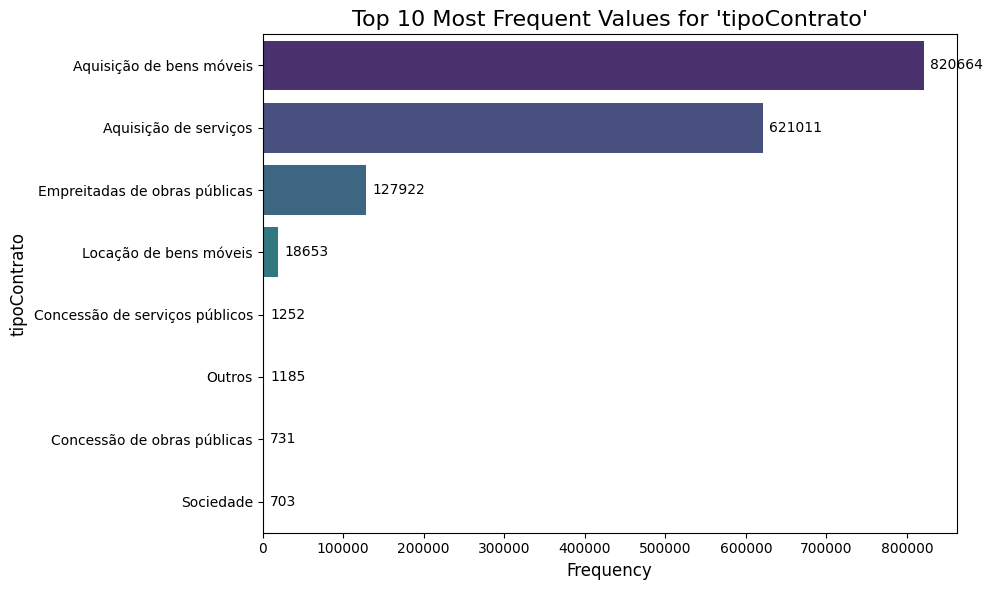

In [185]:
plot_top_n_list(df_geral,"tipoContrato",10)

# idProcedimento (int64)

In [186]:
count_null_and_empty(df_geral, 'idprocedimento')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [187]:
print(df_geral['idprocedimento'].head(10))

0      26474
1      27595
2      27608
3      45737
4      48881
5      48931
6      50905
7      58870
8      59199
9    1002842
Name: idprocedimento, dtype: int64


In [188]:
print_top_n(df_geral,"idprocedimento",10)

Top 10 most frequent values for 'idprocedimento':
idprocedimento
6818690    304
6069067    261
6823524    240
5785758    240
6376374    228
6423944    212
6449699    209
6938074    209
5833262    208
6290223    205
Name: count, dtype: int64


In [189]:
print_bottom_n(df_geral,"idprocedimento",10)

Bottom 10 least frequent values for 'idprocedimento':
idprocedimento
7541466    1
7654958    1
7655205    1
7657053    1
7655013    1
7189786    1
7656595    1
7385800    1
7212395    1
7656431    1
Name: count, dtype: int64


# tipoprocedimento (object)

In [190]:
count_null_and_empty(df_geral, 'tipoprocedimento')

Null (NaN) values: 0 (0.00%)
Empty string values: 5 (0.00%)


In [191]:
print(df_geral['tipoprocedimento'].head(10))

0    Ajuste Direto Regime Geral
1    Ajuste Direto Regime Geral
2    Ajuste Direto Regime Geral
3    Ajuste Direto Regime Geral
4    Ajuste Direto Regime Geral
5    Ajuste Direto Regime Geral
6    Ajuste Direto Regime Geral
7    Ajuste Direto Regime Geral
8    Ajuste Direto Regime Geral
9    Ajuste Direto Regime Geral
Name: tipoprocedimento, dtype: object


In [192]:
print(df_geral['tipoprocedimento'].tail(10))


1575981              Concurso público
1575982              Concurso público
1575983              Concurso público
1575984              Concurso público
1575985              Concurso público
1575986    Ajuste Direto Regime Geral
1575987              Concurso público
1575988    Ajuste Direto Regime Geral
1575989    Ajuste Direto Regime Geral
1575990    Ajuste Direto Regime Geral
Name: tipoprocedimento, dtype: object


In [193]:
print_top_n(df_geral,"tipoprocedimento",10)

Top 10 most frequent values for 'tipoprocedimento':
tipoprocedimento
Ajuste Direto Regime Geral                                           897099
Consulta Prévia                                                      257347
Concurso público                                                     181059
Ao abrigo de acordo-quadro (art.º 259.º)                             156659
Ajuste direto simplificado                                            38646
Ao abrigo de acordo-quadro (art.º 258.º)                              34093
Contratação excluída II                                                4469
Concurso limitado por prévia qualificação                              2922
Ajuste direto simplificado ao abrigo da Lei n.º 30/2021, de 21.05      1246
Consulta Prévia Simplificada                                           1239
Name: count, dtype: int64


In [194]:
print_bottom_n(df_geral,"tipoprocedimento",10)

Bottom 10 least frequent values for 'tipoprocedimento':
tipoprocedimento
Parceria para a inovação                                                             2
Concurso de ideias simplificado                                                      3
                                                                                     5
Concurso de conceção simplificado                                                    8
Serviços sociais e outros serviços específicos                                       9
Ajuste Direto Regime Geral ao abrigo do artigo 7º da Lei n.º 30/2021, de 21.05      24
Consulta prévia ao abrigo do artigo 7º da Lei n.º 30/2021, de 21.05                 30
Concurso público simplificado                                                       62
Procedimento de negociação                                                          69
Setores especiais – isenção parte II                                              1000
Name: count, dtype: int64


In [195]:
df_geral["tipoprocedimento"] = df_geral["tipoprocedimento"].astype("string")

# objectoContrato (object)

In [196]:
count_null_and_empty(df_geral, 'objectoContrato')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [197]:
pd.set_option('display.max_colwidth', None)
print(df_geral['objectoContrato'].head(10))

0                                                                                                                                                   Certificação do Inventário Patrimonial da Simtejo
1                                                                                                                                                                     Aquisição de Material Eléctrico
2                                                                                                                        Prestação de serviços de espectáculos musicais nas Festas de N. Sra Candeias
3                                                                                                       Fornecimento e montagem de candeeiros para reforço da iluminação pública na Av. Madre Andaluz
4                                                                                                                                                        FORNECIMENTO CONTÍNUO DE MATERIAL DE GRÁFICA
5         

In [198]:
print(df_geral['objectoContrato'].tail(10))


1575981                                                                                             A2/1513/2024 Diverso Material para Urologia
1575982                                                                Material de Compressas, Ligaduras e outro Material de Penso - Anos 24/25
1575983                                                                                             A2/1513/2024 Diverso Material para Urologia
1575984                                                                                             A2/1513/2024 Diverso Material para Urologia
1575985                                                                                             A2/1513/2024 Diverso Material para Urologia
1575986    Proc. 24/DMMC/DIEM/24: "Reparação dos ascensores n.º 1 e n.º 4 instalados no edifício municipal dos SSCML, sito na Av. Afonso Costa"
1575987                                                                                             A2/1513/2024 Diverso Material para U

In [199]:
print_top_n(df_geral,"objectoContrato",10)

Top 10 most frequent values for 'objectoContrato':
objectoContrato
MEDICAMENTOS                                                                         10592
REAGENTES                                                                             1646
Aquisição de serviço de viagens e alojamento – Plataforma SIAV                        1181
Medicamentos                                                                          1031
VÁRIOS MEDICAMENTOS                                                                    953
Aquisição de produtos de apoio                                                         878
Aquisição de reagentes                                                                 876
Prestação Serviços                                                                     783
Aquisição de medicamentos                                                              700
Fornecimento de eletricidade em regime de mercado livre para Portugal Continental      695
Name: count, dtype: int

In [200]:
print_bottom_n(df_geral,"objectoContrato",10)

Bottom 10 least frequent values for 'objectoContrato':
objectoContrato
Aquisição de serviços jurídicos na Escola Profissional Cristóvão Colombo, cofinanciado pelo FSE ao abrigo dos seus programas operacionais, nomeadamente o programa operacional RUMOS    1
PR2024551/247 - EFA-24012-TEC AUX SAUDE NS-72903UF0049-De 05/03/2024 a 30/11/2025                                                                                                       1
CP_04_SRLF_UI_2024_AQUISIÇÃO DE VIAGENS E ALOJAMENTO PARA A UI NO ÂMBITO DA REDE HRSN                                                                                                   1
Material de Compressas, Ligaduras e outro Material de Penso - Anos 24/25                                                                                                                1
Proc. 24/DMMC/DIEM/24: "Reparação dos ascensores n.º 1 e n.º 4 instalados no edifício municipal dos SSCML, sito na Av. Afonso Costa"                                                    1

In [201]:
df_geral['objectoContrato'] = df_geral['objectoContrato'].astype("string")

# descContrato (object)

In [202]:
count_null_and_empty(df_geral, 'descContrato')

Null (NaN) values: 0 (0.00%)
Empty string values: 9 (0.00%)


In [203]:
print(df_geral['descContrato'].head(10))

0                                                                         
1                                                                         
2                                                                         
3                                                                         
4                                                                         
5                                                                         
6                                                                         
7                                                                         
8                                                                         
9    PROLONGAMENTO DO COLETOR NA EN10, ENTRE O KM 36+695 E 36+970, SETÚBAL
Name: descContrato, dtype: object


In [204]:
print(df_geral['descContrato'].tail(10))

1575981                                                                               A2/1513/2024 Diverso Material para Urologia
1575982                                                  Material de Compressas, Ligaduras e outro Material de Penso - Anos 24/25
1575983                                                                               A2/1513/2024 Diverso Material para Urologia
1575984                                                                               A2/1513/2024 Diverso Material para Urologia
1575985                                                                               A2/1513/2024 Diverso Material para Urologia
1575986               Reparação dos ascensores n.º 1 e n.º 4 instalados no edifício municipal dos SSCML, sito na Av. Afonso Costa
1575987                                                                               A2/1513/2024 Diverso Material para Urologia
1575988                                                                 Medicamento Valgan

In [205]:
print_top_n(df_geral,"descContrato",10)

Top 10 most frequent values for 'descContrato':
descContrato
MEDICAMENTOS                                                                                                                                           9972
REAGENTES                                                                                                                                              1480
Aquisição de serviço de viagens e alojamento – Plataforma SIAV                                                                                         1184
Contrato de Prestação de Serviços                                                                                                                       946
Contrato de prestação de serviços                                                                                                                       867
Ajuste direto                                                                                                                                           785
For

In [206]:
print_bottom_n(df_geral,"descContrato",10)

Bottom 10 least frequent values for 'descContrato':
descContrato
ANI_428_AD                                                                                                                                                                                                                                                                                                 1
68/0898/2024-Prestação Serviços TSDT Terapia Ocupacional-Ano 2024                                                                                                                                                                                                                                          1
Licenciamento MS Enterprise Agreement, para a Comissão de Coordenação e Desenvolvimento Regional                                                                                                                                                                                                           1
Aquisição de energia elétrica em

In [207]:
df_geral['descContrato'] = df_geral['descContrato'].astype("string")

# adjudicante (object)

In [208]:
count_null_and_empty(df_geral, 'adjudicante')

Null (NaN) values: 18 (0.00%)
Empty string values: 0 (0.00%)


In [209]:
pd.set_option('display.max_colwidth', None)
print(df_geral['adjudicante'].head(20))

0     [505908093 - SIMTEJO – Saneamento Integrado dos Municípios do Tejo e Trancão, SA]
1                                                     [501206639 - Município de Mourão]
2                                                     [501206639 - Município de Mourão]
3                                                   [505941350 - Município de Santarém]
4                                                    [506656128 - MUNICIPIO DE PAREDES]
5                                                     [501206639 - Município de Mourão]
6                                                      [506814343 - Município de Mação]
7                                                     [501205551 - MUNICIPIO DE CHAVES]
8                                                      [501121528 - Município da Lousã]
9                                                    [501294104 - Município de Setúbal]
10                [508142156 - Centro Hospitalar Vila Nova de Gaia - Espinho, E. P. E.]
11                [508142156 - C

In [210]:
print(df_geral['adjudicante'].tail(20))

1575971               [510745997 - Unidade Local de Saúde do Algarve, E. P. E.]
1575972               [510745997 - Unidade Local de Saúde do Algarve, E. P. E.]
1575973       [501442600 - Centro de Emprego e Formação Profissional de Águeda]
1575974                                      [502834846 - Município do Montijo]
1575975        [504448064 - Navegação Aérea de Portugal - NAV Portugal, E.P.E.]
1575976      [509822932 - Unidade Local de Saúde da Região de Leiria, E. P. E.]
1575977    [501442600 - Instituto do Emprego e da Formação Profissional, I. P.]
1575978      [509822932 - Unidade Local de Saúde da Região de Leiria, E. P. E.]
1575979                               [600008878 - Guarda Nacional Republicana]
1575980      [509822932 - Unidade Local de Saúde da Região de Leiria, E. P. E.]
1575981      [509822932 - Unidade Local de Saúde da Região de Leiria, E. P. E.]
1575982              [507606787 - Unidade Local de Saúde da Arrábida, E. P. E.]
1575983      [509822932 - Unidade Local 

In [211]:
df_geral['adjudicante_string'] = df_geral['adjudicante'].astype("string")

In [212]:
print(df_geral['adjudicante_string'].head(20))

0     ['505908093 - SIMTEJO – Saneamento Integrado dos Municípios do Tejo e Trancão, SA']
1                                                     ['501206639 - Município de Mourão']
2                                                     ['501206639 - Município de Mourão']
3                                                   ['505941350 - Município de Santarém']
4                                                    ['506656128 - MUNICIPIO DE PAREDES']
5                                                     ['501206639 - Município de Mourão']
6                                                      ['506814343 - Município de Mação']
7                                                     ['501205551 - MUNICIPIO DE CHAVES']
8                                                      ['501121528 - Município da Lousã']
9                                                    ['501294104 - Município de Setúbal']
10                ['508142156 - Centro Hospitalar Vila Nova de Gaia - Espinho, E. P. E.']
11        

In [213]:
filtered_df= df_geral[df_geral['adjudicante_string'].str.contains('508958890 - IGH - Investimentos e Gestão Hidroagrícola', na=False)]
print(filtered_df["adjudicante_string"])


342      ['508958890 - IGH - Investimentos e Gestão Hidroagrícola, S. A.'
 '509574513 - A. R. M. - Águas e Resíduos da Madeira, S. A.'
 '511243138 - Valor Ambiente - Gestão e Administração de Resíduos Madeira, S. A.'
 '511044496 - IGA - Investimentos e Gestão da Água, S. A.'
 '508931649 - IGSERV - Investimentos, Gestão e Serviços, S. A.']
343      ['508958890 - IGH - Investimentos e Gestão Hidroagrícola, S. A.'
 '509574513 - A. R. M. - Águas e Resíduos da Madeira, S. A.'
 '511243138 - Valor Ambiente - Gestão e Administração de Resíduos Madeira, S. A.'
 '511044496 - IGA - Investimentos e Gestão da Água, S. A.'
 '508931649 - IGSERV - Investimentos, Gestão e Serviços, S. A.']
344      ['508958890 - IGH - Investimentos e Gestão Hidroagrícola, S. A.'
 '509574513 - A. R. M. - Águas e Resíduos da Madeira, S. A.'
 '511243138 - Valor Ambiente - Gestão e Administração de Resíduos Madeira, S. A.'
 '511044496 - IGA - Investimentos e Gestão da Água, S. A.'
 '508931649 - IGSERV - Investimentos, Gest

In [214]:
print_top_n_list(df_geral,"adjudicante",20)

Top 20 most frequent values for 'adjudicante':
adjudicante
506362299 - Instituto Português de Oncologia do Porto Francisco Gentil, E. P. E.     50485
508142156 - Centro Hospitalar Vila Nova de Gaia - Espinho, E. P. E.                  26839
600012662 - Ministério da Defesa Nacional - Marinha                                  24012
508094461 - Unidade Local de Saúde do Norte Alentejano, E. P. E.                     21404
508481287 - Centro Hospitalar Universitário de Lisboa Norte, E. P. E.                20691
510103448 - Centro Hospitalar e Universitário de Coimbra, E. P. E.                   17857
509822940 - Centro Hospitalar Tondela-Viseu, E. P. E.                                17536
500051070 - Município de Lisboa                                                      13470
506361470 - Hospital Garcia de Orta, E. P. E.                                        13373
509822932 - Centro Hospitalar de Leiria, E. P. E.                                    11572
510745997 - Centro Hospitalar U

In [215]:
def extract_nipc_and_description_from_list_or_str(entries):
    nipcs = []
    descs = []
    
    # Normalize input to list of strings
    if isinstance(entries, (list, np.ndarray)):
        entries_list = entries
    elif isinstance(entries, str):
        # If string looks like list (starts and ends with brackets)
        if entries.startswith('[') and entries.endswith(']'):
            content = entries[1:-1].strip()
            # Split entries on pattern: comma that follows a 9-digit number and dash
            # Use regex to split on commas **only if** preceded by a pattern like 'digits -'
            # Because commas can appear inside descriptions, naive split(', ') won't work
            # We'll find all occurrences of the pattern '9digits - description'
            pattern = r'\d{9}\s*-\s*[^,]+(?:, [^,]+)*'
            entries_list = re.findall(pattern, content)
        else:
            # Single string entry (not a list)
            entries_list = [entries]
    else:
        return pd.Series([None, None])
    
    for entry in entries_list:
        entry = re.sub(r'[–—−]', '-', entry)  # Normalize dashes
        match = re.match(r'^\s*(\d{9})\s*-\s*(.+)', entry)
        if match:
            nipcs.append(match.group(1))
            descs.append(match.group(2).strip())
        else:
            nipcs.append(None)
            descs.append(None)
    
    # Always return lists (or None if empty)
    return pd.Series([nipcs if nipcs else None, descs if descs else None])

In [216]:
df_geral[['adjudicante_nipc', 'adjudicante_description']] = df_geral['adjudicante'].apply(extract_nipc_and_description_from_list_or_str)

In [217]:
display(df_geral[['adjudicante', 'adjudicante_nipc', 'adjudicante_description']].head(20))

,adjudicante,adjudicante_nipc,adjudicante_description
0,"[505908093 - SIMTEJO – Saneamento Integrado dos Municípios do Tejo e Trancão, SA]",[505908093],"[SIMTEJO - Saneamento Integrado dos Municípios do Tejo e Trancão, SA]"
1,[501206639 - Município de Mourão],[501206639],[Município de Mourão]
2,[501206639 - Município de Mourão],[501206639],[Município de Mourão]
3,[505941350 - Município de Santarém],[505941350],[Município de Santarém]
4,[506656128 - MUNICIPIO DE PAREDES],[506656128],[MUNICIPIO DE PAREDES]
5,[501206639 - Município de Mourão],[501206639],[Município de Mourão]
6,[506814343 - Município de Mação],[506814343],[Município de Mação]
7,[501205551 - MUNICIPIO DE CHAVES],[501205551],[MUNICIPIO DE CHAVES]
8,[501121528 - Município da Lousã],[501121528],[Município da Lousã]
9,[501294104 - Município de Setúbal],[501294104],[Município de Setúbal]


In [218]:
# Filter rows with nulls in either column
missing_rows = df_geral[df_geral['adjudicante_nipc'].isna() | df_geral['adjudicante_description'].isna()]
# Display the first 20 rows
display(missing_rows[['adjudicante', 'adjudicante_nipc', 'adjudicante_description']].head(10))

,adjudicante,adjudicante_nipc,adjudicante_description
83000,None,None,None
83018,None,None,None
83029,None,None,None
164954,None,None,None
164956,None,None,None
164957,None,None,None
209948,None,None,None
214727,None,None,None
216324,None,None,None
222115,None,None,None


In [219]:
filtered_df= df_geral[df_geral['adjudicante_string'].str.contains('508958890 - IGH - Investimentos e Gestão Hidroagrícola', na=False)]
print(filtered_df[['adjudicante', 'adjudicante_nipc', 'adjudicante_description']])

                                                                                                                                                                                                                                                                                                                             adjudicante  \
342    [508958890 - IGH - Investimentos e Gestão Hidroagrícola, S. A., 509574513 - A. R. M. - Águas e Resíduos da Madeira, S. A., 511243138 - Valor Ambiente - Gestão e Administração de Resíduos Madeira, S. A., 511044496 - IGA - Investimentos e Gestão da Água, S. A., 508931649 - IGSERV - Investimentos, Gestão e Serviços, S. A.]   
343    [508958890 - IGH - Investimentos e Gestão Hidroagrícola, S. A., 509574513 - A. R. M. - Águas e Resíduos da Madeira, S. A., 511243138 - Valor Ambiente - Gestão e Administração de Resíduos Madeira, S. A., 511044496 - IGA - Investimentos e Gestão da Água, S. A., 508931649 - IGSERV - Investimentos, Gestão e Serviços, S. A.]   
344 

In [220]:
count_null_and_empty(df_geral, 'adjudicante_description')

Null (NaN) values: 18 (0.00%)
Empty string values: 0 (0.00%)


In [221]:
print_top_n_list(df_geral,"adjudicante_description",10)

Top 10 most frequent values for 'adjudicante_description':
adjudicante_description
Instituto Português de Oncologia do Porto Francisco Gentil, E. P. E.    50485
Centro Hospitalar Vila Nova de Gaia - Espinho, E. P. E.                 26839
Ministério da Defesa Nacional - Marinha                                 24020
Unidade Local de Saúde do Norte Alentejano, E. P. E.                    21404
Centro Hospitalar Universitário de Lisboa Norte, E. P. E.               20691
Centro Hospitalar e Universitário de Coimbra, E. P. E.                  17864
Centro Hospitalar Tondela-Viseu, E. P. E.                               17536
Município de Lisboa                                                     13472
Hospital Garcia de Orta, E. P. E.                                       13373
Centro Hospitalar de Leiria, E. P. E.                                   11572
Name: count, dtype: int64


In [222]:
print_bottom_n_list(df_geral,"adjudicante_description",10)

Bottom 10 least frequent values for 'adjudicante_description':
adjudicante_description
SIMTEJO - Saneamento Integrado dos Municípios do Tejo e Trancão, SA                1
On The Road - Associação Humanitária                                               1
ESTAMO - Participações Imobiliárias, S. A.                                         1
MUNICIPIO DE PAREDES                                                               1
CAF - Centro de Apoio à Família                                                    1
Centro Hospitalar do Oeste,E.P.E                                                   1
AIRC - Ass.de Informática Região Centro                                            1
IFLOP - Instituto de Formação dos Países de Língua Oficial Portuguesa, C. R. L.    1
União de Freguesias de Cepos e Teixeira                                            1
Agrupamento de Escolas de Vagos - SNCP                                             1
Name: count, dtype: int64


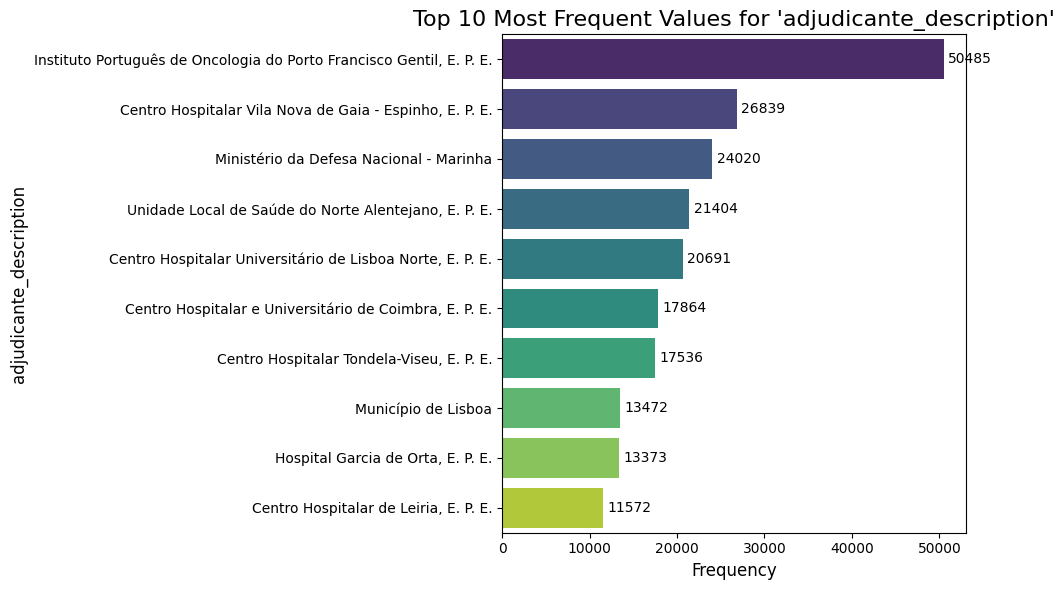

In [223]:
plot_top_n_list(df_geral,"adjudicante_description",10)

In [224]:
count_null_and_empty(df_geral, 'adjudicante_nipc')

Null (NaN) values: 18 (0.00%)
Empty string values: 0 (0.00%)


In [225]:
print_top_n_list(df_geral,"adjudicante_nipc",10)

Top 10 most frequent values for 'adjudicante_nipc':
adjudicante_nipc
506362299    52087
508481287    40691
508142156    33751
600012662    28320
510745997    25850
508094461    25545
510103448    24937
509822940    20993
508080142    20062
506361470    18167
Name: count, dtype: int64


In [226]:
print_bottom_n_list(df_geral,"adjudicante_nipc",10)

Bottom 10 least frequent values for 'adjudicante_nipc':
adjudicante_nipc
502406640    1
507031377    1
515772275    1
508637376    1
900157240    1
502386630    1
902001779    1
507731794    1
513167510    1
501168397    1
Name: count, dtype: int64


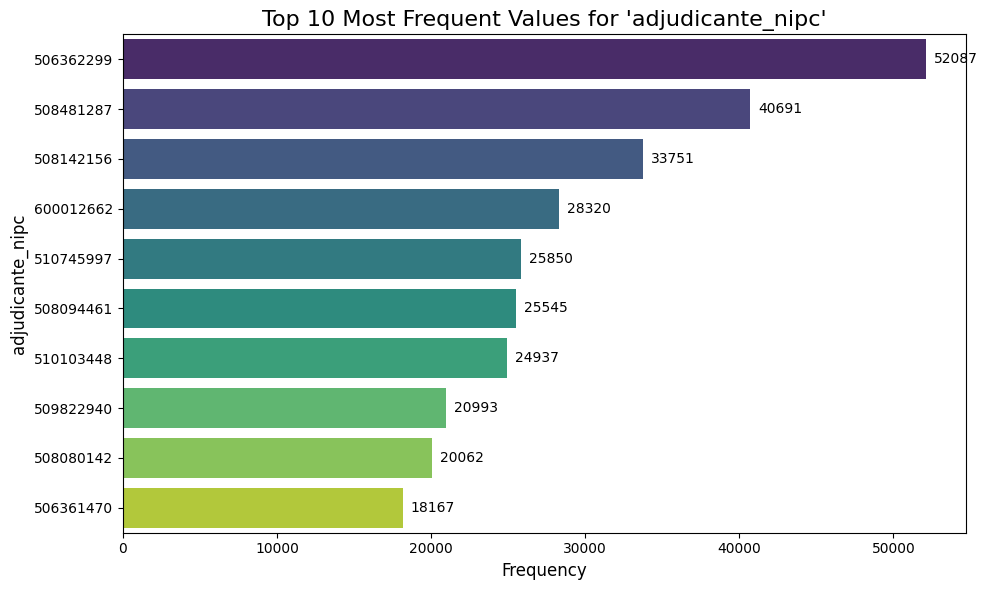

In [227]:
plot_top_n_list(df_geral,"adjudicante_nipc",10)

# adjudicatarios (object)

In [228]:
count_null_and_empty(df_geral, 'adjudicatarios')

Null (NaN) values: 1949 (0.12%)
Empty string values: 0 (0.00%)


In [229]:
pd.set_option('display.max_colwidth', None)
print(df_geral['adjudicatarios'].head(20))

0                                             [504193279 - PRICEWATERHOUSECOOPERS]
1         [505001764 - Electro Requetim – Distribuição de Material Eléctrico, S.A]
2                          [503547271 - Corval Som – Produções Audiovisuais, Ld.ª]
3                       [502480840 - Teletejo, Telecomunicações do Ribatejo, S.A.]
4                                     [503731080 - INVULGAR – ARTES GRAFICAS, LDª]
5                                     [508080975 - Ricoh Portugal Unipessoal, Lda]
6     [503365998 - CT Q- Projectos de Engenharia e Gestão de Empreendimentos, Lda]
7                                                [- - Jaime Jorge Rocha Rodrigues]
8                                          [506229580 - Olímpia &amp; Filhos, Lda]
9                [501369295 - CME - Construção e Manutenção Electromecânica, S.A.]
10                                 [503347345 - BAXTER MEDICO - FARMACÊUTICA, LDA]
11                                                  [503047201 - CSL Behring, Lda]
12  

In [230]:
print(df_geral['adjudicatarios'].tail(20))

1575971                                                                                                                                                                                                                                                                                                                                                                  [- - DENISE BEATRIZ RODRIGUES ANDRADE]
1575972                                                                                                                                                                                                                                                                                                                                                                    [- - JOÃO MIGUEL QUINTINO GUERREIRO]
1575973                                                                                                                                                                                                 

In [231]:
df_geral['adjudicatarios_string'] = df_geral['adjudicatarios'].astype("string")

In [232]:
print(df_geral['adjudicatarios_string'].head(20))

0                                             ['504193279 - PRICEWATERHOUSECOOPERS']
1         ['505001764 - Electro Requetim – Distribuição de Material Eléctrico, S.A']
2                          ['503547271 - Corval Som – Produções Audiovisuais, Ld.ª']
3                       ['502480840 - Teletejo, Telecomunicações do Ribatejo, S.A.']
4                                     ['503731080 - INVULGAR – ARTES GRAFICAS, LDª']
5                                     ['508080975 - Ricoh Portugal Unipessoal, Lda']
6     ['503365998 - CT Q- Projectos de Engenharia e Gestão de Empreendimentos, Lda']
7                                                ['- - Jaime Jorge Rocha Rodrigues']
8                                          ['506229580 - Olímpia &amp; Filhos, Lda']
9                ['501369295 - CME - Construção e Manutenção Electromecânica, S.A.']
10                                 ['503347345 - BAXTER MEDICO - FARMACÊUTICA, LDA']
11                                                  ['503047201 -

In [233]:
filtered_df= df_geral[df_geral['adjudicatarios_string'].str.contains('CLINIFAR SA', na=False)]
print(filtered_df["adjudicatarios_string"])

18174                                                                                                                                                                                                                                                                                                                                                                                                ['503281115 - CLINIFAR SA']
27264                                                                                                                                                                                                                                                                                                                                                                                                ['503281115 - CLINIFAR SA']
51352                                                                                                                                                                 

In [234]:
print_top_n_list(df_geral,"adjudicatarios_string",20)

Top 20 most frequent values for 'adjudicatarios_string':
adjudicatarios_string
['504223933 - MEDTRONIC PORTUGAL, LDA']                              3496
['504223933 - MEDTRONIC PORTUGAL, LDA.']                             2580
['500162166 - LAB. PFIZER, LDA.']                                    2090
['500153370 - JOHNSON &amp; JOHNSON, LDA']                           2083
['507045491 - TEVA PHARMA - PRODUTOS FARMACEUTICOS,LDA']             1891
['500233810 - ROCHE FARMACÊUTICA QUIMICA, LDA.']                     1794
['502248793 - MYLAN, LDA.']                                          1681
['501506543 - B BRAUN MEDICAL, LDA.']                                1632
['500697370 - Petrogal, S.A.']                                       1610
['504293753 - FRESENIUS KABI PHARMA PORTUGAL']                       1609
['502266791 - HIKMA FARMACÊUTICA (PORTUGAL) SA.']                    1608
['504615947 - MEO - Serviços de Comunicações e Multimédia, S.A.']    1561
['508107997 - GENERIS - FARMACEUT

In [235]:
df_geral[['adjudicatarios_nipc', 'adjudicatarios_description']] = df_geral['adjudicatarios'].apply(extract_nipc_and_description_from_list_or_str)

In [236]:
display(df_geral[['adjudicatarios', 'adjudicatarios_nipc', 'adjudicatarios_description']].head(20))

,adjudicatarios,adjudicatarios_nipc,adjudicatarios_description
0,[504193279 - PRICEWATERHOUSECOOPERS],[504193279],[PRICEWATERHOUSECOOPERS]
1,"[505001764 - Electro Requetim – Distribuição de Material Eléctrico, S.A]",[505001764],"[Electro Requetim - Distribuição de Material Eléctrico, S.A]"
2,"[503547271 - Corval Som – Produções Audiovisuais, Ld.ª]",[503547271],"[Corval Som - Produções Audiovisuais, Ld.ª]"
3,"[502480840 - Teletejo, Telecomunicações do Ribatejo, S.A.]",[502480840],"[Teletejo, Telecomunicações do Ribatejo, S.A.]"
4,"[503731080 - INVULGAR – ARTES GRAFICAS, LDª]",[503731080],"[INVULGAR - ARTES GRAFICAS, LDª]"
5,"[508080975 - Ricoh Portugal Unipessoal, Lda]",[508080975],"[Ricoh Portugal Unipessoal, Lda]"
6,"[503365998 - CT Q- Projectos de Engenharia e Gestão de Empreendimentos, Lda]",[503365998],"[CT Q- Projectos de Engenharia e Gestão de Empreendimentos, Lda]"
7,[- - Jaime Jorge Rocha Rodrigues],[None],[None]
8,"[506229580 - Olímpia &amp; Filhos, Lda]",[506229580],"[Olímpia &amp; Filhos, Lda]"
9,"[501369295 - CME - Construção e Manutenção Electromecânica, S.A.]",[501369295],"[CME - Construção e Manutenção Electromecânica, S.A.]"


In [237]:
# Filter rows with nulls in either column
missing_rows = df_geral[df_geral['adjudicatarios_nipc'].isna() | df_geral['adjudicatarios_description'].isna()]
# Display the first 20 rows
display(missing_rows[['adjudicatarios', 'adjudicatarios_nipc', 'adjudicatarios_description']].head(10))

,adjudicatarios,adjudicatarios_nipc,adjudicatarios_description
223198,None,None,None
397426,None,None,None
400666,None,None,None
407286,None,None,None
408107,None,None,None
408174,None,None,None
410185,None,None,None
411836,None,None,None
416342,None,None,None
419116,None,None,None


In [238]:
filtered_df= df_geral[df_geral['adjudicatarios_string'].str.contains('508958890 - IGH - Investimentos e Gestão Hidroagrícola', na=False)]
print(filtered_df[['adjudicatarios', 'adjudicatarios_nipc', 'adjudicatarios_description']])

Empty DataFrame
Columns: [adjudicatarios, adjudicatarios_nipc, adjudicatarios_description]
Index: []


In [239]:
count_null_and_empty(df_geral, 'adjudicatarios_description')

Null (NaN) values: 1949 (0.12%)
Empty string values: 0 (0.00%)


In [240]:
print_top_n_list(df_geral,"adjudicatarios_description",10)

Top 10 most frequent values for 'adjudicatarios_description':
adjudicatarios_description
MEDTRONIC PORTUGAL, LDA                              3563
MEDTRONIC PORTUGAL, LDA.                             2647
GENERIS - FARMACEUTICA, S.A.                         2589
LAB. PFIZER, LDA.                                    2287
Petrogal, S.A.                                       2239
JOHNSON &amp; JOHNSON, LDA                           2122
TEVA PHARMA - PRODUTOS FARMACEUTICOS,LDA             2110
ROCHE FARMACÊUTICA QUIMICA, LDA.                     2026
MYLAN, LDA.                                          1827
MEO - Serviços de Comunicações e Multimédia, S.A.    1801
Name: count, dtype: int64


In [241]:
print_bottom_n_list(df_geral,"adjudicatarios_description",10)

Bottom 10 least frequent values for 'adjudicatarios_description':
adjudicatarios_description
Paramédica - Equipamentos Médicos, Lda                               1
Gabinete 118 - Gestão de Obras e Projetos Ldª                        1
Medinfar - Sorológico, Lda.                                          1
Ceifar Segredos - Unipessoal, Lda.                                   1
Ilidio Fragoso &amp;amp; Filhos, Lda                                 1
Viveiros dos Serafins, Lda                                           1
IDG - INSTITUTO DE DESENVOLVIMENTO DE GUIMARÃES, UNIPESSOAL, LDA.    1
GENUINE WELCOME - UNIPESSOAL LDA                                     1
B - Simple Healthcare Solutions, Lda                                 1
PT Dance Academy                                                     1
Name: count, dtype: int64


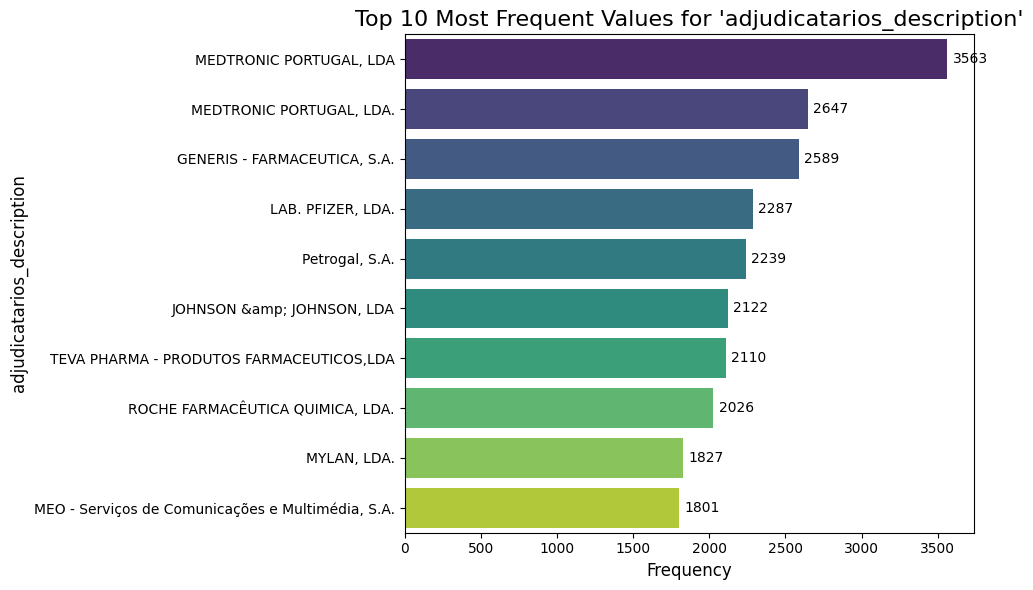

In [242]:
plot_top_n_list(df_geral,"adjudicatarios_description",10)

In [243]:
count_null_and_empty(df_geral, 'adjudicatarios_nipc')

Null (NaN) values: 1949 (0.12%)
Empty string values: 0 (0.00%)


In [244]:
print_top_n_list(df_geral,"adjudicatarios_nipc",10)

Top 10 most frequent values for 'adjudicatarios_nipc':
adjudicatarios_nipc
501506543    13975
508107997    11490
504223933    11186
501169580     8547
505792362     7975
504615947     7895
500153370     7511
504293753     7428
500063524     7173
500162166     6858
Name: count, dtype: int64


In [245]:
print_bottom_n_list(df_geral,"adjudicatarios_nipc",10)

Bottom 10 least frequent values for 'adjudicatarios_nipc':
adjudicatarios_nipc
516793713    1
506229580    1
515097950    1
514576227    1
503014419    1
509467857    1
506134563    1
504431102    1
504894854    1
514600608    1
Name: count, dtype: int64


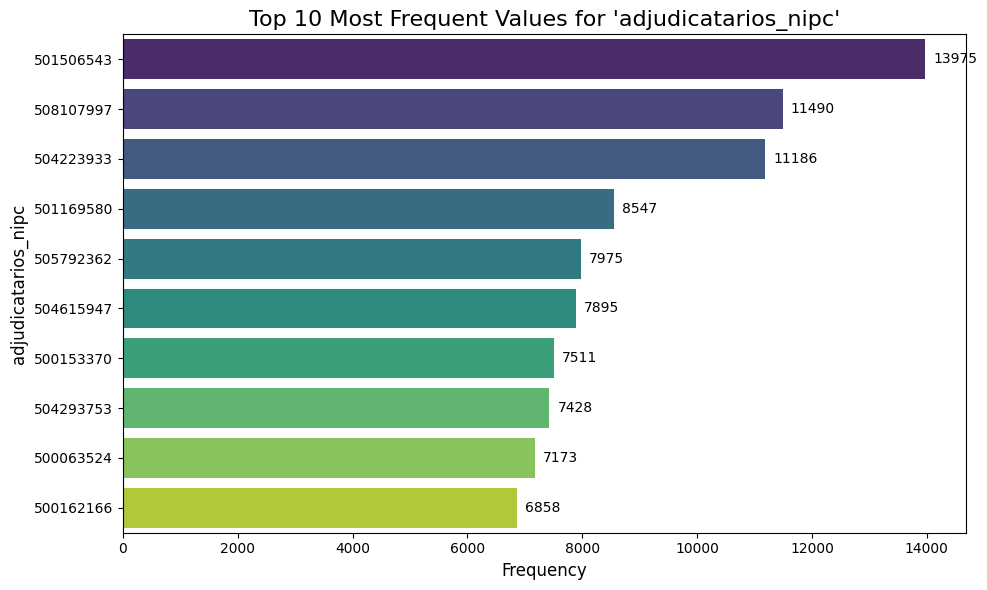

In [246]:
plot_top_n_list(df_geral,"adjudicatarios_nipc",10)

# dataPublicacao (object)

In [247]:
count_null_and_empty(df_geral, 'dataPublicacao')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [248]:
pd.set_option('display.max_colwidth', None)
print(df_geral['dataPublicacao'].head(10))

0    10/02/2009
1    30/10/2008
2    29/01/2009
3    25/04/2009
4    07/05/2009
5    07/05/2009
6    14/05/2009
7    05/06/2009
8    08/06/2009
9    07/06/2013
Name: dataPublicacao, dtype: object


In [249]:
print(df_geral['dataPublicacao'].tail(10))

1575981    30/05/2025
1575982    30/05/2025
1575983    30/05/2025
1575984    30/05/2025
1575985    30/05/2025
1575986    30/05/2025
1575987    30/05/2025
1575988    30/05/2025
1575989    30/05/2025
1575990    30/05/2025
Name: dataPublicacao, dtype: object


In [250]:
print_top_n(df_geral,"dataPublicacao",10)

Top 10 most frequent values for 'dataPublicacao':
dataPublicacao
30/05/2023    1730
27/12/2023    1485
03/01/2024    1463
27/12/2024    1435
28/12/2023    1408
30/12/2024    1397
19/12/2024    1366
22/01/2024    1348
29/12/2023    1307
04/01/2024    1245
Name: count, dtype: int64


In [251]:
print_bottom_n(df_geral,"dataPublicacao",10)

Bottom 10 least frequent values for 'dataPublicacao':
dataPublicacao
25/04/2009    1
18/05/2025    1
29/05/2016    1
22/05/2016    1
05/11/2017    1
23/06/2024    1
28/02/2017    1
04/05/2025    1
08/03/2015    1
10/02/2009    1
Name: count, dtype: int64


In [252]:
df_geral['dataPublicacao'] = df_geral['dataPublicacao'].astype("string")

In [253]:
df_geral['dataPublicacaoParsed'] = pd.to_datetime(df_geral['dataPublicacao'], errors='coerce', dayfirst=True)
failed_count = df_geral['dataPublicacaoParsed'].isna().sum()
print(f"Number of values that failed datetime parsing: {failed_count}")

Number of values that failed datetime parsing: 0


In [254]:
# Comparing values on 'Data de Publicação' with 'Data de Publicação Parsed'
parsed_as_str = df_geral['dataPublicacaoParsed'].dt.strftime('%d/%m/%Y')
mismatches = (parsed_as_str != df_geral['dataPublicacao']).sum()
print(f"Number of values that differ between original and parsed stringified dates: {mismatches}")

Number of values that differ between original and parsed stringified dates: 0


In [255]:
# Counting 'Data de Publicação Parsed' by year
df_geral['anoPublicação'] = df_geral['dataPublicacaoParsed'].dt.year
publications_per_year = df_geral['anoPublicação'].value_counts(dropna=False).sort_index()
print(publications_per_year)

anoPublicação
2008         1
2009         8
2013         1
2015     88557
2016    110900
2017    127097
2018    121888
2019    144692
2020    164009
2021    192027
2022    186991
2023    193089
2024    224368
2025     22363
Name: count, dtype: int64


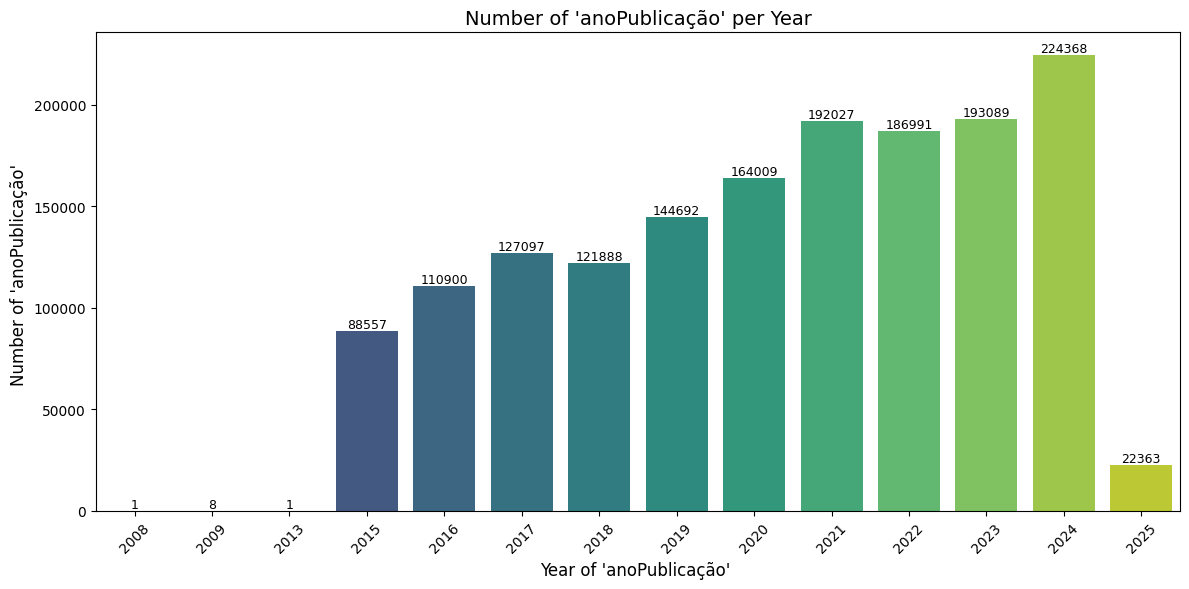

In [256]:
plot_per_year(publications_per_year,'anoPublicação')

# dataCelebracaoContrato (object)

In [257]:
count_null_and_empty(df_geral, 'dataCelebracaoContrato')

Null (NaN) values: 0 (0.00%)
Empty string values: 39901 (2.53%)


In [258]:
pd.set_option('display.max_colwidth', None)
print(df_geral['dataCelebracaoContrato'].head(10))

0              
1              
2              
3              
4              
5              
6              
7              
8              
9    20/04/2015
Name: dataCelebracaoContrato, dtype: object


In [259]:
print(df_geral['dataCelebracaoContrato'].tail(10))

1575981    13/09/2024
1575982    08/07/2024
1575983    13/09/2024
1575984    13/09/2024
1575985    13/09/2024
1575986    27/03/2024
1575987    13/09/2024
1575988    21/11/2024
1575989    29/10/2024
1575990    22/10/2024
Name: dataCelebracaoContrato, dtype: object


In [260]:
print_top_n(df_geral,"dataCelebracaoContrato",10)

Top 10 most frequent values for 'dataCelebracaoContrato':
dataCelebracaoContrato
              39901
02/01/2017     2096
04/01/2016     1664
02/01/2020     1510
04/01/2021     1460
29/12/2023     1448
03/01/2022     1439
29/02/2024     1346
21/12/2023     1328
17/09/2021     1312
Name: count, dtype: int64


In [261]:
print_bottom_n(df_geral,"dataCelebracaoContrato",10)

Bottom 10 least frequent values for 'dataCelebracaoContrato':
dataCelebracaoContrato
10/06/2018    1
25/12/2018    1
11/10/2015    1
14/07/2019    1
16/02/2020    1
17/01/2016    1
10/05/2020    1
29/08/2015    1
23/09/2018    1
02/08/2015    1
Name: count, dtype: int64


In [262]:
df_geral['dataCelebracaoContrato'] = df_geral['dataCelebracaoContrato'].astype("string")

In [263]:
df_geral['dataCelebracaoContratoParsed'] = pd.to_datetime(df_geral['dataCelebracaoContrato'], errors='coerce', dayfirst=True)
failed_count = df_geral['dataCelebracaoContratoParsed'].isna().sum()
print(f"Number of values that failed datetime parsing: {failed_count}")

Number of values that failed datetime parsing: 39901


In [264]:
# Comparing values on 'Data de Publicação' with 'Data de Publicação Parsed'
parsed_as_str = df_geral['dataCelebracaoContratoParsed'].dt.strftime('%d/%m/%Y')
mismatches = (parsed_as_str != df_geral['dataCelebracaoContrato']).sum()
print(f"Number of values that differ between original and parsed stringified dates: {mismatches}")

Number of values that differ between original and parsed stringified dates: 0


In [265]:
# Counting 'Data de Publicação Parsed' by year
df_geral['anoDataCelebracaoContrato'] = df_geral['dataCelebracaoContratoParsed'].dt.year
publications_per_year = df_geral['anoDataCelebracaoContrato'].value_counts(dropna=False).sort_index()
print(publications_per_year)

anoDataCelebracaoContrato
2015.0    108177
2016.0    115064
2017.0    128603
2018.0    127919
2019.0    145461
2020.0    149772
2021.0    177246
2022.0    173519
2023.0    190860
2024.0    219469
NaN        39901
Name: count, dtype: int64


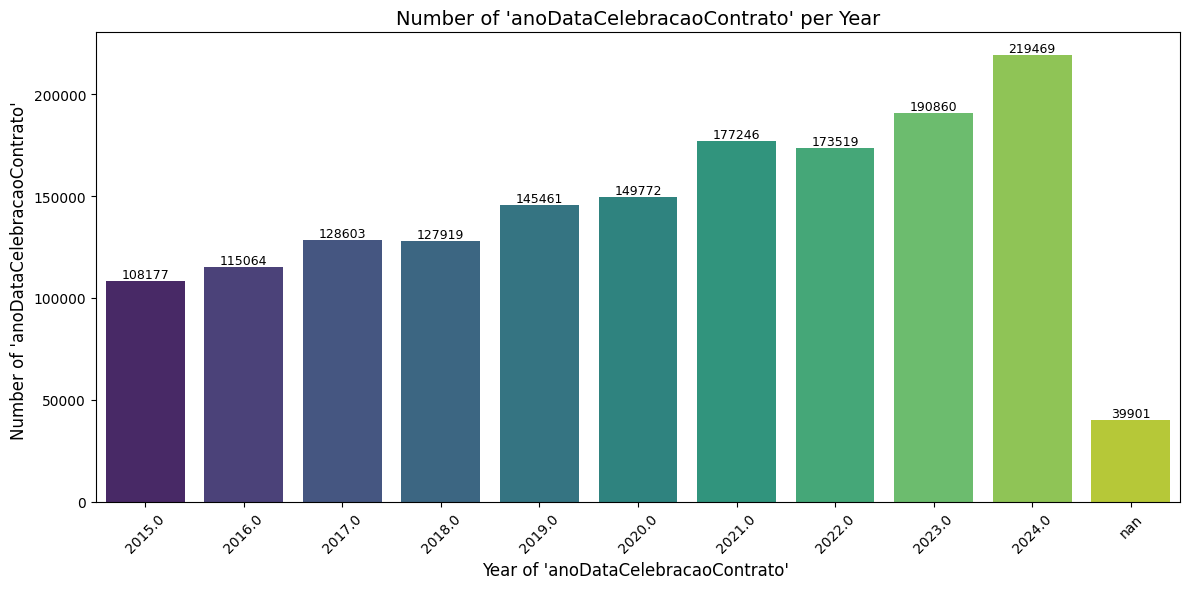

In [266]:
plot_per_year(publications_per_year,'anoDataCelebracaoContrato')

# precoContratual (float64)

In [267]:
count_null_and_empty(df_geral, 'precoContratual')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [268]:
pd.set_option('display.max_colwidth', None)
print(df_geral['precoContratual'].head(10))

0     6000.00
1    36529.96
2    45500.00
3     9799.53
4    42000.00
5     9760.00
6    14300.00
7    12000.00
8      825.00
9    19052.43
Name: precoContratual, dtype: float64


In [269]:
print(df_geral['precoContratual'].tail(10))

1575981     11250.00
1575982    142632.54
1575983     17600.00
1575984     10875.00
1575985     35358.00
1575986      2896.00
1575987     54567.00
1575988      2003.90
1575989       139.32
1575990        25.00
Name: precoContratual, dtype: float64


In [270]:
print_top_n(df_geral,"precoContratual",10)

Top 10 most frequent values for 'precoContratual':
precoContratual
15000.0    6907
10000.0    6565
6000.0     5864
12000.0    5654
9000.0     5273
18000.0    5258
0.0        4977
7500.0     4517
20000.0    4476
8000.0     3680
Name: count, dtype: int64


In [271]:
print_bottom_n(df_geral,"precoContratual",10)

Bottom 10 least frequent values for 'precoContratual':
precoContratual
11372.90     1
572.84       1
34177.50     1
411732.19    1
5388.88      1
8387.04      1
17976.10     1
7953.90      1
33185.50     1
13352.20     1
Name: count, dtype: int64


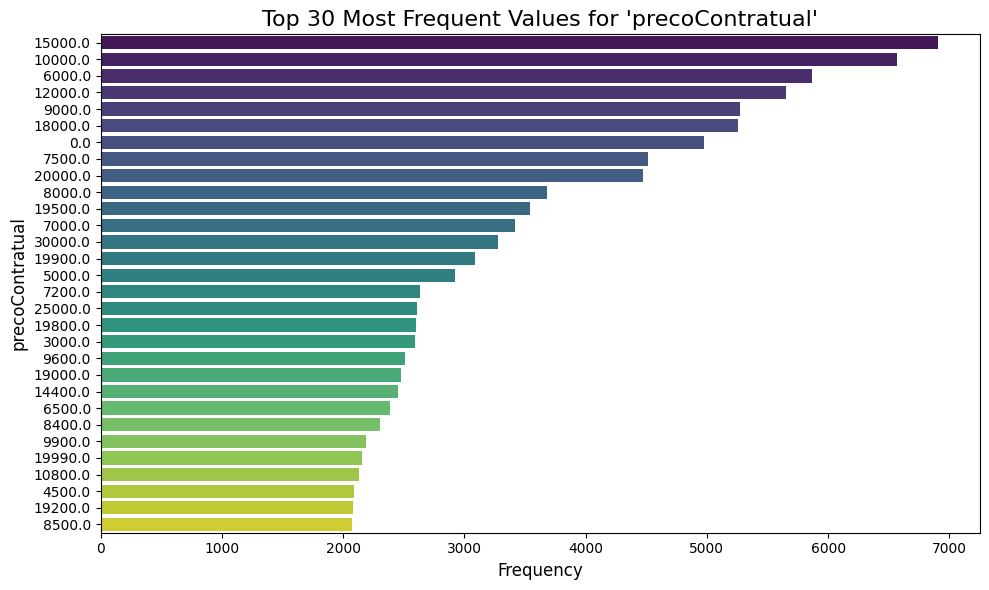

In [272]:
plot_top_n_numeric(df_geral,"precoContratual",30)

In [273]:
bins = [0, 5000, 50000, 139000, 5350000, np.inf]  # Define the intervals
labels = ['Up to 5,000 €', '5,001 € to 50,000 €', '50,001 € to 139,000 €','139,001 € to 5,350,000 €',  'Above 5,350,000 €']
# group data by the intervals
df_geral['precoContratualInterval'] = pd.cut(df_geral['precoContratual'], bins=bins, labels=labels)
# Count the occurrences in each interval
count_by_interval = df_geral['precoContratualInterval'].value_counts().sort_index()
print(count_by_interval)

precoContratualInterval
Up to 5,000 €               497598
5,001 € to 50,000 €         810693
50,001 € to 139,000 €       161227
139,001 € to 5,350,000 €     99660
Above 5,350,000 €             1665
Name: count, dtype: int64


In [274]:
print(df_geral[['precoContratual', 'precoContratualInterval']].head(20))

    precoContratual   precoContratualInterval
0           6000.00       5,001 € to 50,000 €
1          36529.96       5,001 € to 50,000 €
2          45500.00       5,001 € to 50,000 €
3           9799.53       5,001 € to 50,000 €
4          42000.00       5,001 € to 50,000 €
5           9760.00       5,001 € to 50,000 €
6          14300.00       5,001 € to 50,000 €
7          12000.00       5,001 € to 50,000 €
8            825.00             Up to 5,000 €
9          19052.43       5,001 € to 50,000 €
10         48690.00       5,001 € to 50,000 €
11        600607.50  139,001 € to 5,350,000 €
12        281238.60  139,001 € to 5,350,000 €
13            40.50             Up to 5,000 €
14         82726.00     50,001 € to 139,000 €
15         64400.00     50,001 € to 139,000 €
16         34907.52       5,001 € to 50,000 €
17         14313.80       5,001 € to 50,000 €
18          6804.00       5,001 € to 50,000 €
19         21646.00       5,001 € to 50,000 €


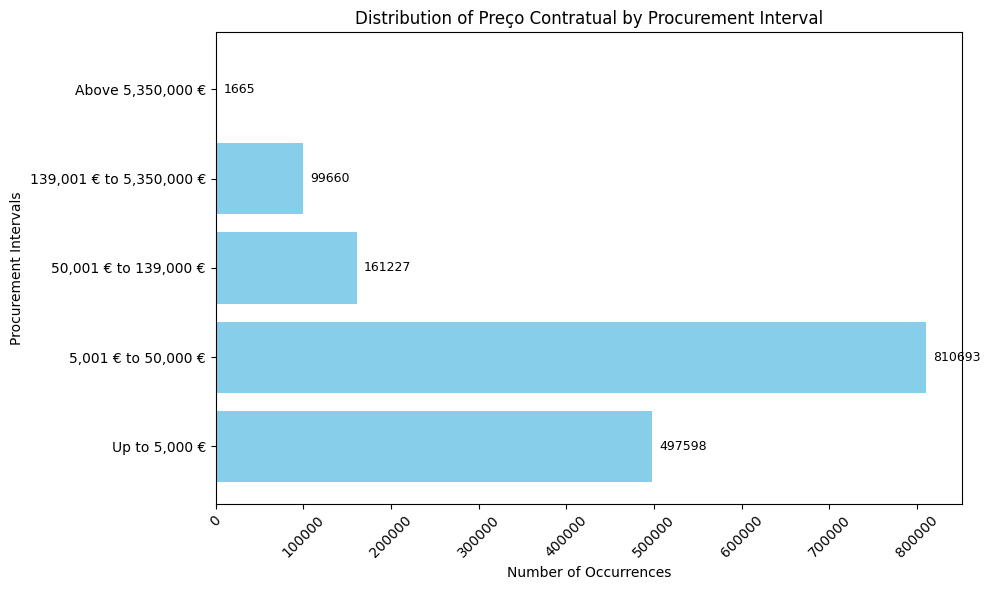

In [275]:
plot_horizontal_bar(
    count_by_interval,
    title="Distribution of Preço Contratual by Procurement Interval",
    xlabel="Number of Occurrences",
    ylabel="Procurement Intervals"
)

# cpv (object)

In [276]:
count_null_and_empty(df_geral, 'cpv')

Null (NaN) values: 27 (0.00%)
Empty string values: 0 (0.00%)


In [277]:
pd.set_option('display.max_colwidth', None)
print(df_geral['cpv'].head(10))

0                                             None
1                                             None
2                                             None
3                                             None
4                                             None
5                                             None
6                                             None
7                                             None
8                                             None
9    [45232400-6 - Obras de construção de esgotos]
Name: cpv, dtype: object


In [278]:
print(df_geral['cpv'].tail(10))

1575981              [33140000-3 - Material médico de consumo]
1575982                         [33141111-1 - Pensos adesivos]
1575983              [33140000-3 - Material médico de consumo]
1575984              [33140000-3 - Material médico de consumo]
1575985              [33140000-3 - Material médico de consumo]
1575986    [50750000-7 - Serviços de manutenção de elevadores]
1575987              [33140000-3 - Material médico de consumo]
1575988                     [33690000-3 - Medicamentos vários]
1575989                     [33690000-3 - Medicamentos vários]
1575990                                [22456000-1 - Licenças]
Name: cpv, dtype: object


In [279]:
df_geral['cpv_string'] = df_geral['cpv'].astype("string")

In [280]:
print(df_geral['cpv_string'].head(20))

0                                                <NA>
1                                                <NA>
2                                                <NA>
3                                                <NA>
4                                                <NA>
5                                                <NA>
6                                                <NA>
7                                                <NA>
8                                                <NA>
9     ['45232400-6 - Obras de construção de esgotos']
10            ['33600000-6 - Produtos farmacêuticos']
11            ['33600000-6 - Produtos farmacêuticos']
12            ['33600000-6 - Produtos farmacêuticos']
13            ['33600000-6 - Produtos farmacêuticos']
14            ['33600000-6 - Produtos farmacêuticos']
15            ['33600000-6 - Produtos farmacêuticos']
16                ['33100000-1 - Equipamento médico']
17                ['33100000-1 - Equipamento médico']
18                ['33100000

In [281]:
filtered_df= df_geral[df_geral['cpv_string'].str.contains('CLINIFAR SA', na=False)]
print(filtered_df["cpv_string"])

Series([], Name: cpv_string, dtype: string)


In [282]:
print_top_n_list(df_geral,"cpv_string",20)

Top 20 most frequent values for 'cpv_string':
cpv_string
['33600000-6 - Produtos farmacêuticos']                                                                             135363
['33000000-0 - Equipamento médico, medicamentos e produtos para cuidados pessoais']                                 103405
['33140000-3 - Material médico de consumo']                                                                          63085
['50000000-5 - Serviços de reparação e manutenção']                                                                  35658
['33690000-3 - Medicamentos vários']                                                                                 34201
['33100000-1 - Equipamento médico']                                                                                  26225
['92000000-1 - Serviços recreativos, culturais e desportivos']                                                       15471
['80000000-4 - Serviços de ensino e formação']                                    

In [283]:
def extract_cpv_and_description_from_list_or_str(entries):
    cpvs = []
    descs = []
    # Normalize input to list of strings
    if isinstance(entries, (list, np.ndarray)):
        entries_list = entries
    elif isinstance(entries, str):
        if entries.startswith('[') and entries.endswith(']'):
            content = entries[1:-1].strip()
            # Extract CPV patterns: "digits-dash-digit - description"
            pattern = r'\d{8}-\d\s*-\s*[^,]+(?:, [^,\[\]]+)*'
            entries_list = re.findall(pattern, content)
        else:
            entries_list = [entries]
    else:
        return pd.Series([None, None])
    for entry in entries_list:
        entry = re.sub(r'[–—−]', '-', entry)  # Normalize dashes
        match = re.match(r'^\s*(\d{8}-\d)\s*-\s*(.+)', entry)
        if match:
            cpvs.append(match.group(1))
            descs.append(match.group(2).strip())
        else:
            cpvs.append(None)
            descs.append(None)
    return pd.Series([cpvs if cpvs else None, descs if descs else None])

In [284]:
df_geral[['cpv_number', 'cpv_description']] = df_geral['cpv'].apply(extract_cpv_and_description_from_list_or_str)

In [285]:
display(df_geral[['cpv', 'cpv_number', 'cpv_description']].head(20))

,cpv,cpv_number,cpv_description
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None
5,None,None,None
6,None,None,None
7,None,None,None
8,None,None,None
9,[45232400-6 - Obras de construção de esgotos],[45232400-6],[Obras de construção de esgotos]


In [286]:
# Filter rows with nulls in either column
missing_rows = df_geral[df_geral['cpv_number'].isna() | df_geral['cpv_description'].isna()]
# Display the first 20 rows
display(missing_rows[['cpv', 'cpv_number', 'cpv_description']].head(10))

,cpv,cpv_number,cpv_description
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None
5,None,None,None
6,None,None,None
7,None,None,None
8,None,None,None
13628,None,None,None


In [287]:
filtered_df= df_geral[df_geral['cpv_string'].str.contains('medicamentos', na=False)]
print(filtered_df[['cpv', 'cpv_number', 'cpv_description']])

                                                                                       cpv  \
302      [33000000-0 - Equipamento médico, medicamentos e produtos para cuidados pessoais]   
308      [33000000-0 - Equipamento médico, medicamentos e produtos para cuidados pessoais]   
310      [33000000-0 - Equipamento médico, medicamentos e produtos para cuidados pessoais]   
400      [33000000-0 - Equipamento médico, medicamentos e produtos para cuidados pessoais]   
407      [33000000-0 - Equipamento médico, medicamentos e produtos para cuidados pessoais]   
...                                                                                    ...   
1575924  [33000000-0 - Equipamento médico, medicamentos e produtos para cuidados pessoais]   
1575925  [33000000-0 - Equipamento médico, medicamentos e produtos para cuidados pessoais]   
1575930  [33000000-0 - Equipamento médico, medicamentos e produtos para cuidados pessoais]   
1575947  [33000000-0 - Equipamento médico, medicamentos e pr

In [288]:
count_null_and_empty(df_geral, 'cpv_description')

Null (NaN) values: 27 (0.00%)
Empty string values: 0 (0.00%)


In [289]:
print_top_n_list(df_geral,"cpv_description",10)

Top 10 most frequent values for 'cpv_description':
cpv_description
Produtos farmacêuticos                                                135397
Equipamento médico, medicamentos e produtos para cuidados pessoais    103531
Material médico de consumo                                             63307
Serviços de reparação e manutenção                                     35876
Medicamentos vários                                                    34298
Equipamento médico                                                     26297
Serviços recreativos, culturais e desportivos                          15491
Reagentes de laboratório                                               14214
Serviços de ensino e formação                                          14063
Produtos alimentares, bebidas, tabaco e produtos afins                 13387
Name: count, dtype: int64


In [290]:
print_bottom_n_list(df_geral,"cpv_description",10)

Bottom 10 least frequent values for 'cpv_description':
cpv_description
Células fotovoltaicas                                                                   1
Serviços de exploração de portos e vias navegáveis e serviços conexos                   1
Serviços de reparação e manutenção de aeronaves, mísseis e naves espaciais militares    1
Conjuntos de juntas para flanges                                                        1
Serviços de desenvolvimento de software para folhas de cálculo e melhorias              1
Rodas hidráulicas                                                                       1
Construção de viaduto ferroviário                                                       1
Oculares para microscópios                                                              1
Construção de palácio                                                                   1
Serviços de instalação de máquinas para agricultura e silvicultura                      1
Name: count, dtype: int64


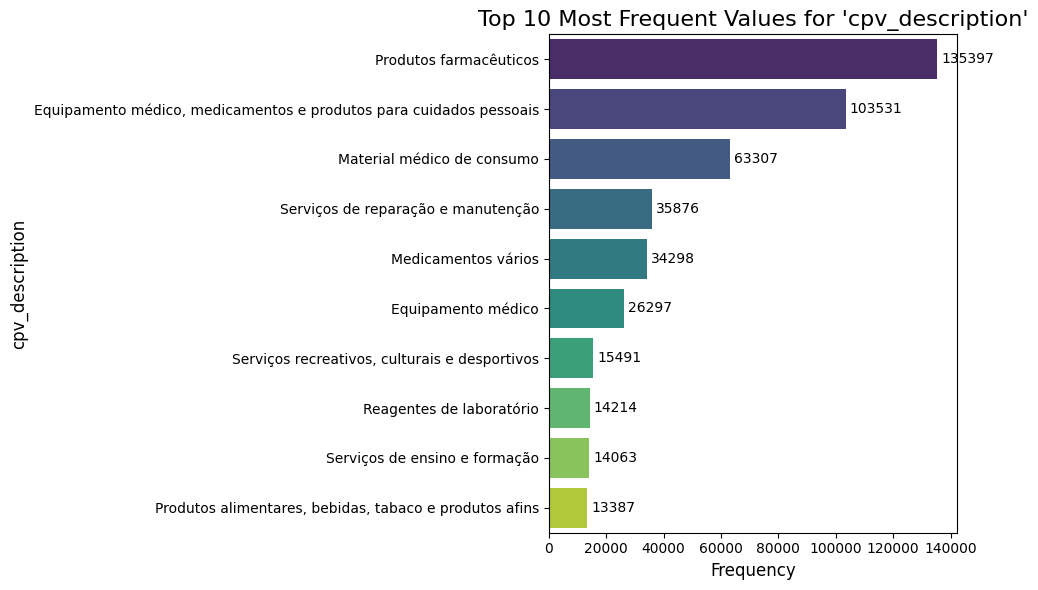

In [291]:
plot_top_n_list(df_geral,"cpv_description",10)

In [292]:
count_null_and_empty(df_geral, 'cpv_number')

Null (NaN) values: 27 (0.00%)
Empty string values: 0 (0.00%)


In [293]:
print_top_n_list(df_geral,"cpv_number",10)

Top 10 most frequent values for 'cpv_number':
cpv_number
33600000-6    135397
33000000-0    103531
33140000-3     63307
50000000-5     35876
33690000-3     34298
33100000-1     26297
92000000-1     15491
33696500-0     14214
80000000-4     14063
15000000-8     13387
Name: count, dtype: int64


In [294]:
print_bottom_n_list(df_geral,"cpv_number",10)

Bottom 10 least frequent values for 'cpv_number':
cpv_number
30233170-3    1
34522350-0    1
48981000-8    1
65410000-0    1
14614000-8    1
31321300-5    1
43721000-3    1
15623000-1    1
15898000-9    1
45213230-4    1
Name: count, dtype: int64


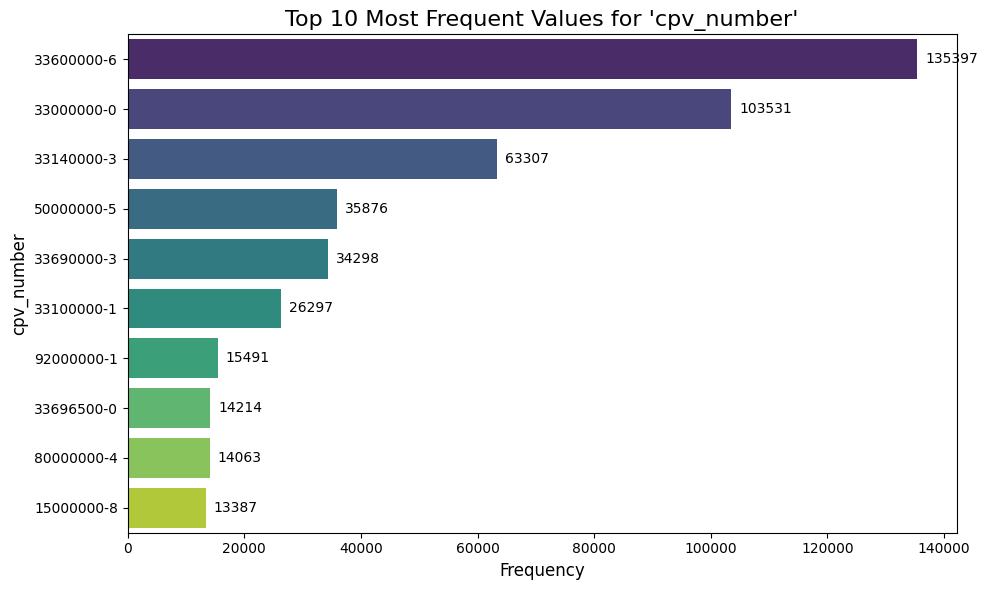

In [295]:
plot_top_n_list(df_geral,"cpv_number",10)

# prazoExecucao (int64)

In [296]:
count_null_and_empty(df_geral, 'prazoExecucao')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [297]:
pd.set_option('display.max_colwidth', None)
print(df_geral['prazoExecucao'].head(10))

0      28
1      15
2       5
3       3
4    1095
5       8
6      90
7      28
8       5
9      30
Name: prazoExecucao, dtype: int64


In [298]:
print(df_geral['prazoExecucao'].tail(10))

1575981    730
1575982     24
1575983    730
1575984    730
1575985    730
1575986     15
1575987    730
1575988    365
1575989    365
1575990      1
Name: prazoExecucao, dtype: int64


In [299]:
print_top_n(df_geral,'prazoExecucao',10)

Top 10 most frequent values for 'prazoExecucao':
prazoExecucao
365     224529
30      136673
20       97897
60       65710
1        65283
90       51598
1095     42153
0        41844
15       37145
5        34480
Name: count, dtype: int64


In [300]:
print_bottom_n(df_geral,'prazoExecucao',10)

Bottom 10 least frequent values for 'prazoExecucao':
prazoExecucao
2063     1
3240     1
1563     1
22219    1
1497     1
1978     1
7427     1
1486     1
3896     1
1851     1
Name: count, dtype: int64


In [301]:
max_prazo_valor = df_geral['prazoExecucao'].max()
print("Maximum 'prazoExecucao (dias)':", max_prazo_valor)
print("Maximum 'prazoExecucao (anos)':", max_prazo_valor/365)
max_rows = df_geral[df_geral['prazoExecucao'] == max_prazo_valor]

Maximum 'prazoExecucao (dias)': 509948286
Maximum 'prazoExecucao (anos)': 1397118.591780822


In [302]:
top_30_prazos = df_geral['prazoExecucao'].sort_values(ascending=False).head(10)
print("Top 30 highest values for 'prazoExecucao (dias)':")
print(top_30_prazos)

Top 30 highest values for 'prazoExecucao (dias)':
250583     509948286
1453061    365744304
217550     161003950
393812     120261324
339192      60498000
133160      38870500
503991      36522400
439094      31581952
1568520     31122024
456816      30647249
Name: prazoExecucao, dtype: int64


In [303]:
step = 30
bins = list(np.arange(0, max_prazo_valor + step, step))
bins[-1] = np.inf  # Set the last bin to cover all values above the last real edge
labels = [f"{int(bins[i])}-{int(bins[i+1]-1)} dias" if not np.isinf(bins[i+1]) else f"{int(bins[i])}+ dias"
          for i in range(len(bins)-1)]
df_geral['prazoExecucaoIntervalo'] = pd.cut(df_geral['prazoExecucao'], bins=bins, labels=labels)
# Count the occurrences in each interval
count_by_interval = df_geral['prazoExecucaoIntervalo'].value_counts().sort_index()
# Display the counts
count_gt_one = count_by_interval[count_by_interval > 1]
# Display the filtered counts
print(count_gt_one)

prazoExecucaoIntervalo
0-29 dias                 496064
30-59 dias                131081
60-89 dias                 89301
90-119 dias                62246
120-149 dias               36028
                           ...  
133290-133319 dias            11
133650-133679 dias             2
738510-738539 dias             5
739230-739259 dias             3
22052010-22052039 dias         2
Name: count, Length: 190, dtype: int64


In [304]:
print(df_geral[['prazoExecucao', 'prazoExecucaoIntervalo']].head(20))

    prazoExecucao prazoExecucaoIntervalo
0              28              0-29 dias
1              15              0-29 dias
2               5              0-29 dias
3               3              0-29 dias
4            1095         1080-1109 dias
5               8              0-29 dias
6              90             60-89 dias
7              28              0-29 dias
8               5              0-29 dias
9              30              0-29 dias
10            365           360-389 dias
11            365           360-389 dias
12            365           360-389 dias
13            365           360-389 dias
14            365           360-389 dias
15            365           360-389 dias
16            365           360-389 dias
17            365           360-389 dias
18            365           360-389 dias
19            365           360-389 dias


# localExecucao (object)

In [305]:
count_null_and_empty(df_geral, 'localExecucao')

Null (NaN) values: 38674 (2.45%)
Empty string values: 0 (0.00%)


In [306]:
pd.set_option('display.max_colwidth', None)
print(df_geral['localExecucao'].head(10))

0                             None
1                             None
2                             None
3                             None
4                             None
5                             None
6                             None
7    [Portugal, Vila Real, Chaves]
8       [Portugal, Coimbra, Lousã]
9     [Portugal, Setúbal, Setúbal]
Name: localExecucao, dtype: object


In [307]:
print(df_geral['localExecucao'].tail(10))

1575981           [Portugal, Leiria, Leiria]
1575982         [Portugal, Setúbal, Setúbal]
1575983           [Portugal, Leiria, Leiria]
1575984           [Portugal, Leiria, Leiria]
1575985           [Portugal, Leiria, Leiria]
1575986           [Portugal, Lisboa, Lisboa]
1575987           [Portugal, Leiria, Leiria]
1575988                     [Portugal, Faro]
1575989                     [Portugal, Faro]
1575990    [Portugal, Vila Real, Mesão Frio]
Name: localExecucao, dtype: object


# fundamentacao (object)

In [308]:
count_null_and_empty(df_geral, 'fundamentacao')

Null (NaN) values: 0 (0.00%)
Empty string values: 51888 (3.29%)


In [309]:
pd.set_option('display.max_colwidth', None)
print(df_geral['fundamentacao'].head(20))

0                                              Não Preenchido
1                                              Não Preenchido
2                                              Não Preenchido
3                                              Não Preenchido
4                                              Não Preenchido
5                                              Não Preenchido
6                                              Não Preenchido
7                                              Não Preenchido
8                                              Não Preenchido
9     Artigo 19.º, alínea a) do Código dos Contratos Públicos
10              Artigo 259.º do Código dos Contratos Públicos
11              Artigo 259.º do Código dos Contratos Públicos
12              Artigo 259.º do Código dos Contratos Públicos
13              Artigo 259.º do Código dos Contratos Públicos
14              Artigo 259.º do Código dos Contratos Públicos
15              Artigo 259.º do Código dos Contratos Públicos
16      

In [310]:
print(df_geral['fundamentacao'].tail(20))

1575971                                   artigo 6.º n.º 1 do DLR n.º 27/2015/A, de 29.12
1575972                                   artigo 6.º n.º 1 do DLR n.º 27/2015/A, de 29.12
1575973                               artigo 6.º-A n.º 1 do Código dos Contratos Públicos
1575974                    Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos
1575975                                       Artigo 11º do Código dos Contratos Públicos
1575976                    Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos
1575977                               artigo 6.º-A n.º 1 do Código dos Contratos Públicos
1575978                    Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos
1575979                    Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos
1575980                    Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos
1575981                    Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos
1575982   

In [311]:
print_top_n(df_geral,'fundamentacao',10)

Top 10 most frequent values for 'fundamentacao':
fundamentacao
Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos                    252211
Artigo 20.º, n.º 1, alínea d) do Código dos Contratos Públicos                    252133
Artigo 20.º, n.º 1, alínea c) do Código dos Contratos Públicos                    207118
Artigo 259.º do Código dos Contratos Públicos                                     151572
Artigo 24.º, n.º 1, alínea c) do Código dos Contratos Públicos                    130623
Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos                     99803
Artigo 24.º, n.º 1, alínea e), subalínea ii) do Código dos Contratos Públicos      68284
                                                                                   51888
Artigo 24.º, n.º 1, alínea e), subalínea iii) do Código dos Contratos Públicos     39486
Artigo 19.º, alínea a) do Código dos Contratos Públicos                            38874
Name: count, dtype: int64


In [312]:
print_bottom_n(df_geral,'fundamentacao',10)

Bottom 10 least frequent values for 'fundamentacao':
fundamentacao
Artigo 40.º, n.º 1, alínea a) do DL 41/2008, de 10.03             1
Artigo 35.º, nº 1 do DL nº 29-A/2011, de 01.03                    1
artigo 43.º, n.º 4 do Decreto-Lei n.º 33/2018, de 15.05           1
Artigo 57.º, n.º 2, do DL n.º 84/2019, de 28,06                   1
Artigo 4.º, alínea a), da RCM n.º 38-B/2020, de 19.05             1
Artigo 5.º, n.º 5, do Regulamento (CE) n.º 1370/2007, de 23.10    1
Artigo 41.º, n.º 5 do DL nº 25/2017, de 03.03                     1
Artigo 148.º, n.º 2, da Lei n.º 12/2022, de 27.06                 1
Artigo 239.º do Código dos Contratos Públicos                     1
artigo 30.º, n.º 2, do Decreto-Lei 59-A/2024, de 27.09            1
Name: count, dtype: int64


In [313]:
df_geral['fundamentacao'] = df_geral['fundamentacao'].astype("string")

# ProcedimentoCentralizado (object)
Refere-se a um modelo de aquisição em que uma entidade central (normalmente designada por central de compras) realiza procedimentos de contratação em nome de várias outras entidades públicas

In [314]:
# Number of nulls
count_null_and_empty(df_geral, 'ProcedimentoCentralizado')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [315]:
pd.set_option('display.max_colwidth', None)
print(df_geral['ProcedimentoCentralizado'].head(10))

0    NÃ£o
1    NÃ£o
2    NÃ£o
3    NÃ£o
4    NÃ£o
5    NÃ£o
6    NÃ£o
7    NÃ£o
8    NÃ£o
9    NÃ£o
Name: ProcedimentoCentralizado, dtype: object


In [316]:
print(df_geral['ProcedimentoCentralizado'].tail(10))

1575981    NÃ£o
1575982    NÃ£o
1575983    NÃ£o
1575984    NÃ£o
1575985    NÃ£o
1575986    NÃ£o
1575987    NÃ£o
1575988    NÃ£o
1575989    NÃ£o
1575990    NÃ£o
Name: ProcedimentoCentralizado, dtype: object


In [317]:
print_top_n(df_geral,"ProcedimentoCentralizado",10)

Top 10 most frequent values for 'ProcedimentoCentralizado':
ProcedimentoCentralizado
NÃ£o    1523141
Sim       52850
Name: count, dtype: int64


In [318]:
df_geral['ProcedimentoCentralizado'] = df_geral['ProcedimentoCentralizado'].replace('NÃ£o', 'Nao')

In [319]:
print_top_n(df_geral,"ProcedimentoCentralizado",10)

Top 10 most frequent values for 'ProcedimentoCentralizado':
ProcedimentoCentralizado
Nao    1523141
Sim      52850
Name: count, dtype: int64


In [320]:
bool_map = {'Sim': True, 'Nao': False}
df_geral['ProcedimentoCentralizado'] = df_geral['ProcedimentoCentralizado'].map(bool_map).astype('boolean')

In [321]:
count_null_and_empty(df_geral, 'ProcedimentoCentralizado')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [322]:
print_top_n(df_geral,"ProcedimentoCentralizado",10)

Top 10 most frequent values for 'ProcedimentoCentralizado':
ProcedimentoCentralizado
False    1523141
True       52850
Name: count, dtype: Int64


# numAcordoQuadro (object)
(ver feature seguinte 'Descrição do Acordo Quadro')
Este número serve como identificador único do procedimento, permitindo consultar detalhes como a entidade adjudicante, objeto do contrato, fornecedores selecionados e documentos associados. Para obter informações específicas sobre cada Acordo Quadro, como o objeto, entidades envolvidas e documentos relacionados, pode aceder diretamente ao Portal BASE.

In [323]:
# Number of nulls
count_null_and_empty(df_geral, 'numAcordoQuadro')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [324]:
pd.set_option('display.max_colwidth', None)
print(df_geral['numAcordoQuadro'].head(20))

0       NULL
1       NULL
2       NULL
3       NULL
4       NULL
5       NULL
6       NULL
7       NULL
8       NULL
9       NULL
10    535788
11    535788
12    535788
13    535788
14    535788
15    535788
16    448705
17    448705
18    448705
19    448705
Name: numAcordoQuadro, dtype: object


In [325]:
print(df_geral['numAcordoQuadro'].tail(20))

1575971    NULL
1575972    NULL
1575973    NULL
1575974    NULL
1575975    NULL
1575976    NULL
1575977    NULL
1575978    NULL
1575979    NULL
1575980    NULL
1575981    NULL
1575982    NULL
1575983    NULL
1575984    NULL
1575985    NULL
1575986    NULL
1575987    NULL
1575988    NULL
1575989    NULL
1575990    NULL
Name: numAcordoQuadro, dtype: object


In [326]:
df_geral['numAcordoQuadro'] = df_geral['numAcordoQuadro'].replace('NULL', pd.NA)

In [327]:
count_null_and_empty(df_geral, 'numAcordoQuadro')

Null (NaN) values: 1389726 (88.18%)
Empty string values: 0 (0.00%)


In [328]:
print_top_n(df_geral,"numAcordoQuadro",10)

Top 10 most frequent values for 'numAcordoQuadro':
numAcordoQuadro
5032541    10959
2969238     6670
5715196     5405
1771819     4482
5152742     2797
610968      2772
4088496     2306
7013489     2278
6677696     2240
4665403     2077
Name: count, dtype: int64


In [329]:
print_bottom_n(df_geral,"numAcordoQuadro",10)

Bottom 10 least frequent values for 'numAcordoQuadro':
numAcordoQuadro
250996     1
6279760    1
7161436    1
5398197    1
7189608    1
7010539    1
216718     1
7352381    1
7116735    1
6017614    1
Name: count, dtype: int64


In [330]:
df_geral['numAcordoQuadro'] = df_geral['numAcordoQuadro'].astype('Int64')

In [331]:
count_null_and_empty(df_geral, 'numAcordoQuadro')

Null (NaN) values: 1389726 (88.18%)
Empty string values: 0 (0.00%)


# DescrAcordoQuadro (object)

In [332]:
count_null_and_empty(df_geral, 'DescrAcordoQuadro')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [333]:
pd.set_option('display.max_colwidth', None)
print(df_geral['DescrAcordoQuadro'].head(10))

0    NULL
1    NULL
2    NULL
3    NULL
4    NULL
5    NULL
6    NULL
7    NULL
8    NULL
9    NULL
Name: DescrAcordoQuadro, dtype: object


In [334]:
df_geral['DescrAcordoQuadro'] = df_geral['DescrAcordoQuadro'].replace('NULL', '')

In [335]:
count_null_and_empty(df_geral, 'DescrAcordoQuadro')

Null (NaN) values: 0 (0.00%)
Empty string values: 1389726 (88.18%)


In [336]:
print(df_geral['DescrAcordoQuadro'].tail(10))

1575981    
1575982    
1575983    
1575984    
1575985    
1575986    
1575987    
1575988    
1575989    
1575990    
Name: DescrAcordoQuadro, dtype: object


In [337]:
print_top_n(df_geral,"DescrAcordoQuadro",10)

Top 10 most frequent values for 'DescrAcordoQuadro':
DescrAcordoQuadro
                                                                                                                                                              1389726
CP 2021/6 - Medicamentos do foro oncológico e imunomoduladores                                                                                                  10959
CP 2017/6 - Acordo Quadro para fornecimento de Medicamentos do Foro Oncológico e Imunomoduladores, às Instituições e Serviços do Serviço Nacional de Saúde       6670
Acordo Quadro de Viagens e Alojamento                                                                                                                            5405
491/2023 - Concurso público internacional para formação do acordo quadro de medicamentos do foro oncológico e imunomoduladores                                   4518
CP 2015/6 - Acordo quadro para o fornecimento de Medicamentos do Foro Oncológico                   

In [338]:
print_bottom_n(df_geral,"DescrAcordoQuadro",10)

Bottom 10 least frequent values for 'DescrAcordoQuadro':
DescrAcordoQuadro
Aquisição de consumíveis                                                                                                                                               1
Aquisição de serviços de fornecimento de gás natural 100% energia fóssil-abril a dezembro de 2017 aos polos 2 e 3 do Agrupamento de Escolas de Macedo de Cavaleiros    1
ACORDO QUADRO DM CLINICO - KIT SUBSTITUIÇÃO DE NEFROSTOMIA E FIO GUIA                                                                                                  1
Contrato para aquisição de serviços de Manutenção e Assistência Técnica aos sistemas PACS SYNGO nas entidades do Ministério da Saúde para o ano 2019                   1
ACORDO-QUADRO-DM CLINICO-INDICADOR BIOLOGICO                                                                                                                           1
Celebração de cinco acordos quadro para a prestação de serviços no âmbito do sis

In [339]:
# Converting to string
df_geral['DescrAcordoQuadro'] = df_geral['DescrAcordoQuadro'].astype("string")

# precoBaseProcedimento (float64)

In [340]:
count_null_and_empty(df_geral, 'precoBaseProcedimento')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [341]:
pd.set_option('display.max_colwidth', None)
print(df_geral['precoBaseProcedimento'].head(10))

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
5        0.00
6        0.00
7        0.00
8        0.00
9    19995.64
Name: precoBaseProcedimento, dtype: float64


In [342]:
print(df_geral['precoBaseProcedimento'].tail(10))

1575981    266982.65
1575982    204194.60
1575983    266982.65
1575984    266982.65
1575985    266982.65
1575986      2896.00
1575987    266982.65
1575988      2003.90
1575989       150.93
1575990        25.00
Name: precoBaseProcedimento, dtype: float64


In [343]:
print_top_n(df_geral,"precoBaseProcedimento",10)

Top 10 most frequent values for 'precoBaseProcedimento':
precoBaseProcedimento
0.0        95901
15000.0    10361
10000.0     9923
20000.0     7847
12000.0     7803
6000.0      7169
18000.0     6927
9000.0      6789
30000.0     6604
8000.0      5696
Name: count, dtype: int64


In [344]:
print_bottom_n(df_geral,"precoBaseProcedimento",10)

Bottom 10 least frequent values for 'precoBaseProcedimento':
precoBaseProcedimento
4575.96      1
1832.30      1
9767.20      1
3448.20      1
52125.90     1
12212.05     1
8128.38      1
747537.52    1
27728.10     1
868037.86    1
Name: count, dtype: int64


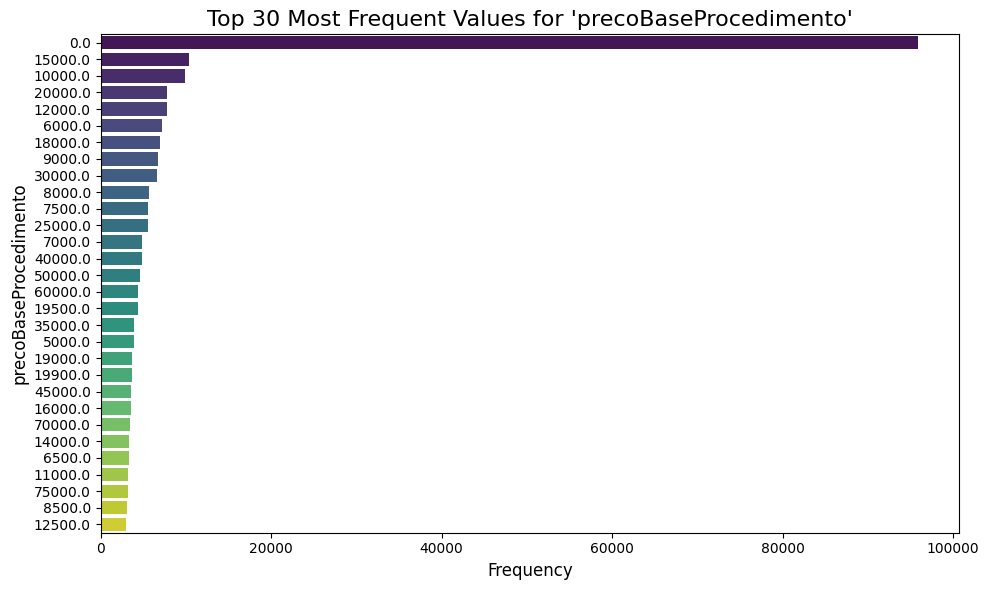

In [345]:
plot_top_n_numeric(df_geral,"precoBaseProcedimento",30)

In [346]:
bins = [-1.0, 0.0, 5000, 50000, 139000, 5350000, np.inf]  # Define the intervals
labels = ['zero','Up to 5,000 €', '5,001 € to 50,000 €', '50,001 € to 139,000 €','139,001 € to 5,350,000 €',  'Above 5,350,000 €']
# group data by the intervals
df_geral['precoBaseProcedimentoInterval'] = pd.cut(df_geral['precoBaseProcedimento'], bins=bins, labels=labels)
# Count the occurrences in each interval
count_by_interval = df_geral['precoBaseProcedimentoInterval'].value_counts().sort_index()
print(count_by_interval)

precoBaseProcedimentoInterval
zero                         95901
Up to 5,000 €               309939
5,001 € to 50,000 €         774792
50,001 € to 139,000 €       200574
139,001 € to 5,350,000 €    174332
Above 5,350,000 €            20414
Name: count, dtype: int64


In [347]:
print(df_geral[['precoBaseProcedimento', 'precoBaseProcedimentoInterval']].head(20))

    precoBaseProcedimento precoBaseProcedimentoInterval
0                    0.00                          zero
1                    0.00                          zero
2                    0.00                          zero
3                    0.00                          zero
4                    0.00                          zero
5                    0.00                          zero
6                    0.00                          zero
7                    0.00                          zero
8                    0.00                          zero
9                19995.64           5,001 € to 50,000 €
10             1077702.60      139,001 € to 5,350,000 €
11             1077702.60      139,001 € to 5,350,000 €
12             1077702.60      139,001 € to 5,350,000 €
13             1077702.60      139,001 € to 5,350,000 €
14             1077702.60      139,001 € to 5,350,000 €
15             1077702.60      139,001 € to 5,350,000 €
16               89318.82         50,001 € to 13

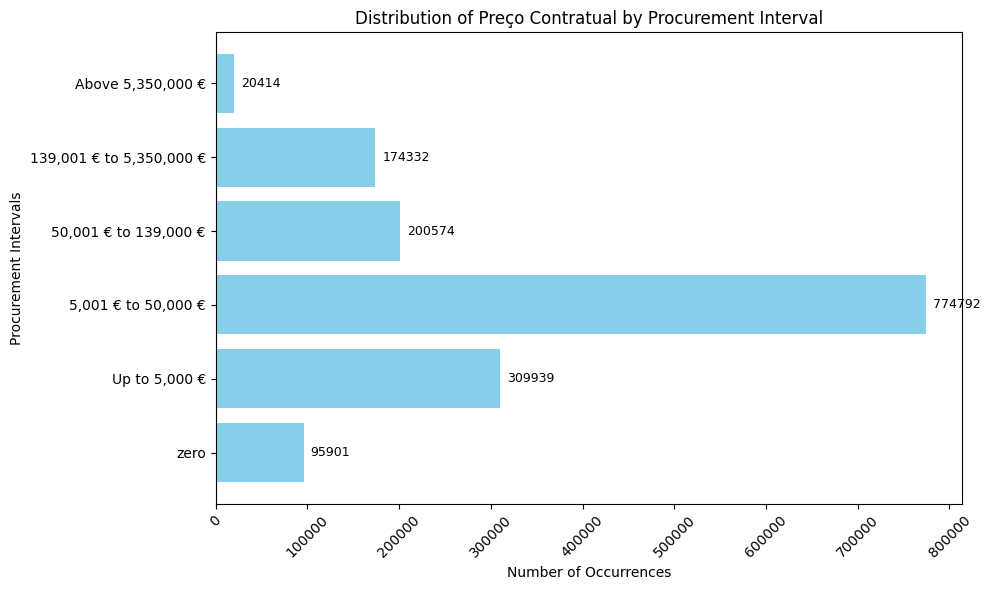

In [348]:
plot_horizontal_bar(
    count_by_interval,
    title="Distribution of Preço Contratual by Procurement Interval",
    xlabel="Number of Occurrences",
    ylabel="Procurement Intervals"
)

# dataDecisaoAdjudicacao (object)

In [349]:
count_null_and_empty(df_geral, 'dataDecisaoAdjudicacao')

Null (NaN) values: 0 (0.00%)
Empty string values: 42734 (2.71%)


In [350]:
pd.set_option('display.max_colwidth', None)
print(df_geral['dataDecisaoAdjudicacao'].head(10))

0              
1              
2              
3              
4              
5              
6              
7              
8              
9    24/03/2015
Name: dataDecisaoAdjudicacao, dtype: object


In [351]:
print(df_geral['dataDecisaoAdjudicacao'].tail(10))

1575981    13/09/2024
1575982    05/07/2024
1575983    13/09/2024
1575984    13/09/2024
1575985    13/09/2024
1575986    19/03/2024
1575987    13/09/2024
1575988    21/11/2024
1575989    29/10/2024
1575990    22/10/2024
Name: dataDecisaoAdjudicacao, dtype: object


In [352]:
print_top_n(df_geral,"dataDecisaoAdjudicacao",10)

Top 10 most frequent values for 'dataDecisaoAdjudicacao':
dataDecisaoAdjudicacao
              42734
21/12/2023     1658
20/12/2023     1568
22/12/2021     1421
29/02/2024     1397
24/04/2024     1362
17/12/2020     1361
11/12/2024     1314
17/09/2021     1276
07/03/2024     1271
Name: count, dtype: int64


In [353]:
print_bottom_n(df_geral,"dataDecisaoAdjudicacao",10)

Bottom 10 least frequent values for 'dataDecisaoAdjudicacao':
dataDecisaoAdjudicacao
13/02/2014    1
06/01/2019    1
19/06/2014    1
07/05/2014    1
30/04/2013    1
06/08/2014    1
20/01/2014    1
02/04/2014    1
03/04/2014    1
20/03/2014    1
Name: count, dtype: int64


In [354]:
df_geral['dataDecisaoAdjudicacao'] = df_geral['dataDecisaoAdjudicacao'].astype("string")

In [355]:
df_geral['dataDecisaoAdjudicacaoParsed'] = pd.to_datetime(df_geral['dataDecisaoAdjudicacao'], errors='coerce', dayfirst=True)
failed_count = df_geral['dataDecisaoAdjudicacaoParsed'].isna().sum()
print(f"Number of values that failed datetime parsing: {failed_count}")

Number of values that failed datetime parsing: 42734


In [356]:
# Comparing values on 'Data de Publicação' with 'Data de Publicação Parsed'
parsed_as_str = df_geral['dataDecisaoAdjudicacaoParsed'].dt.strftime('%d/%m/%Y')
mismatches = (parsed_as_str != df_geral['dataDecisaoAdjudicacao']).sum()
print(f"Number of values that differ between original and parsed stringified dates: {mismatches}")

Number of values that differ between original and parsed stringified dates: 0


In [357]:
# Counting 'Data de Publicação Parsed' by year
df_geral['anoDataDecisaoAdjudicacao'] = df_geral['dataDecisaoAdjudicacaoParsed'].dt.year
publications_per_year = df_geral['anoDataDecisaoAdjudicacao'].value_counts(dropna=False).sort_index()
print(publications_per_year)

anoDataDecisaoAdjudicacao
2010.0         1
2011.0         3
2012.0         6
2013.0        44
2014.0      5195
2015.0    107988
2016.0    116472
2017.0    129365
2018.0    124152
2019.0    145969
2020.0    149793
2021.0    176635
2022.0    173965
2023.0    192232
2024.0    211437
NaN        42734
Name: count, dtype: int64


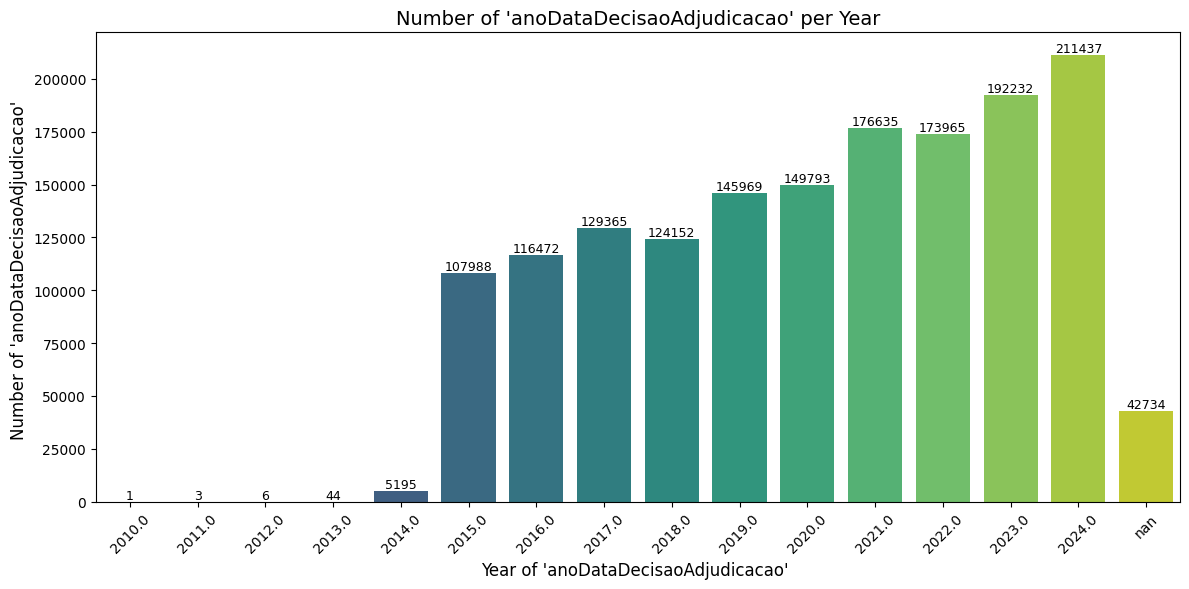

In [358]:
plot_per_year(publications_per_year,'anoDataDecisaoAdjudicacao')

# dataFechoContrato (object)

In [359]:
count_null_and_empty(df_geral, 'dataFechoContrato')

Null (NaN) values: 0 (0.00%)
Empty string values: 1035825 (65.73%)


In [360]:
pd.set_option('display.max_colwidth', None)
print(df_geral['dataFechoContrato'].head(10))

0    10/09/2015
1    24/09/2015
2    24/09/2015
3    07/01/2015
4    25/06/2015
5    24/09/2015
6    10/03/2015
7    05/03/2015
8    28/02/2015
9              
Name: dataFechoContrato, dtype: object


In [361]:
print(df_geral['dataFechoContrato'].tail(10))

1575981    
1575982    
1575983    
1575984    
1575985    
1575986    
1575987    
1575988    
1575989    
1575990    
Name: dataFechoContrato, dtype: object


In [362]:
print_top_n(df_geral,"dataFechoContrato",10)

Top 10 most frequent values for 'dataFechoContrato':
dataFechoContrato
              1035825
31/12/2015       8280
31/12/2019       8266
31/12/2021       8239
31/12/2018       8128
31/12/2020       7719
31/12/2022       7452
31/12/2023       6222
31/12/2017       5411
31/12/2016       5079
Name: count, dtype: int64


In [363]:
print_bottom_n(df_geral,"dataFechoContrato",10)

Bottom 10 least frequent values for 'dataFechoContrato':
dataFechoContrato
25/05/2025    1
13/04/2025    1
17/03/2024    1
30/05/2025    1
21/12/2012    1
25/11/2014    1
04/09/2000    1
12/06/2014    1
24/05/2025    1
16/01/2005    1
Name: count, dtype: int64


In [364]:
df_geral['dataFechoContrato'] = df_geral['dataFechoContrato'].astype("string")

In [365]:
df_geral['dataFechoContratoParsed'] = pd.to_datetime(df_geral['dataFechoContrato'], errors='coerce', dayfirst=True)
failed_count = df_geral['dataFechoContratoParsed'].isna().sum()
print(f"Number of values that failed datetime parsing: {failed_count}")

Number of values that failed datetime parsing: 1035825


In [366]:
# Comparing values on 'Data de Publicação' with 'Data de Publicação Parsed'
parsed_as_str = df_geral['dataFechoContratoParsed'].dt.strftime('%d/%m/%Y')
mismatches = (parsed_as_str != df_geral['dataFechoContrato']).sum()
print(f"Number of values that differ between original and parsed stringified dates: {mismatches}")

Number of values that differ between original and parsed stringified dates: 0


In [367]:
# Counting 'Data de Publicação Parsed' by year
df_geral['anoDataFechoContrato'] = df_geral['dataFechoContratoParsed'].dt.year
publications_per_year = df_geral['anoDataFechoContrato'].value_counts(dropna=False).sort_index()
print(publications_per_year)

anoDataFechoContrato
2000.0          3
2005.0          1
2010.0          1
2012.0          1
2013.0          1
2014.0         18
2015.0      30340
2016.0      37188
2017.0      43680
2018.0      45025
2019.0      49699
2020.0      75008
2021.0      70023
2022.0      68241
2023.0      63599
2024.0      50026
2025.0       7312
NaN       1035825
Name: count, dtype: int64


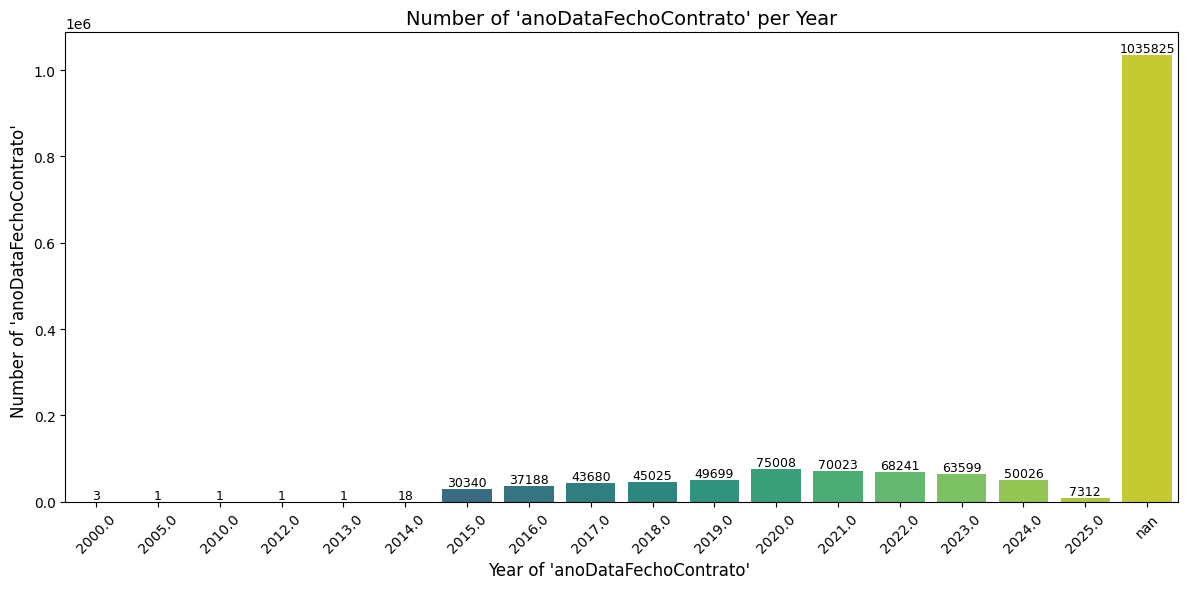

In [368]:
plot_per_year(publications_per_year,'anoDataFechoContrato')

# PrecoTotalEfetivo (float64)

In [369]:
count_null_and_empty(df_geral, 'PrecoTotalEfetivo')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [370]:
pd.set_option('display.max_colwidth', None)
print(df_geral['PrecoTotalEfetivo'].head(10))

0     6000.00
1    36529.96
2    45500.00
3     9799.53
4    36213.00
5     9760.00
6    14300.00
7    11220.00
8      825.00
9        0.00
Name: PrecoTotalEfetivo, dtype: float64


In [371]:
print(df_geral['PrecoTotalEfetivo'].tail(10))

1575981    0.0
1575982    0.0
1575983    0.0
1575984    0.0
1575985    0.0
1575986    0.0
1575987    0.0
1575988    0.0
1575989    0.0
1575990    0.0
Name: PrecoTotalEfetivo, dtype: float64


In [372]:
print_top_n(df_geral,"PrecoTotalEfetivo",10)

Top 10 most frequent values for 'PrecoTotalEfetivo':
PrecoTotalEfetivo
0.0        1017852
6000.0        2104
15000.0       1959
10000.0       1851
12000.0       1741
7500.0        1736
9000.0        1705
18000.0       1434
8000.0        1255
7000.0        1153
Name: count, dtype: int64


In [373]:
print_bottom_n(df_geral,"PrecoTotalEfetivo",10)

Bottom 10 least frequent values for 'PrecoTotalEfetivo':
PrecoTotalEfetivo
197.23       1
27478.00     1
14771.80     1
7685.41      1
7713.39      1
7861.09      1
137744.92    1
103042.14    1
80759.00     1
9658.09      1
Name: count, dtype: int64


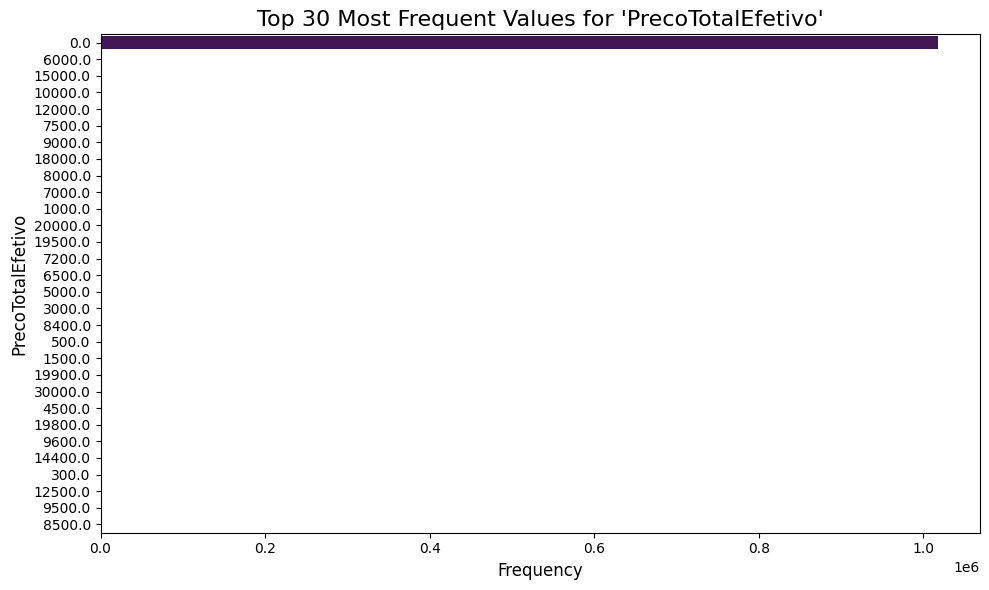

In [374]:
plot_top_n_numeric(df_geral,"PrecoTotalEfetivo",30)

In [375]:
bins = [-1,0, 5000, 50000, 139000, 5350000, np.inf]  # Define the intervals
labels = ['zero','Up to 5,000 €', '5,001 € to 50,000 €', '50,001 € to 139,000 €','139,001 € to 5,350,000 €',  'Above 5,350,000 €']
# group data by the intervals
df_geral['PrecoTotalEfetivoInterval'] = pd.cut(df_geral['PrecoTotalEfetivo'], bins=bins, labels=labels)
# Count the occurrences in each interval
count_by_interval = df_geral['PrecoTotalEfetivoInterval'].value_counts().sort_index()
print(count_by_interval)

PrecoTotalEfetivoInterval
zero                        1017852
Up to 5,000 €                203026
5,001 € to 50,000 €          285326
50,001 € to 139,000 €         45405
139,001 € to 5,350,000 €      23928
Above 5,350,000 €               411
Name: count, dtype: int64


In [376]:
print(df_geral[['PrecoTotalEfetivo', 'PrecoTotalEfetivoInterval']].head(20))

    PrecoTotalEfetivo PrecoTotalEfetivoInterval
0             6000.00       5,001 € to 50,000 €
1            36529.96       5,001 € to 50,000 €
2            45500.00       5,001 € to 50,000 €
3             9799.53       5,001 € to 50,000 €
4            36213.00       5,001 € to 50,000 €
5             9760.00       5,001 € to 50,000 €
6            14300.00       5,001 € to 50,000 €
7            11220.00       5,001 € to 50,000 €
8              825.00             Up to 5,000 €
9                0.00                      zero
10               0.00                      zero
11               0.00                      zero
12               0.00                      zero
13               0.00                      zero
14               0.00                      zero
15               0.00                      zero
16               0.00                      zero
17               0.00                      zero
18               0.00                      zero
19               0.00                   

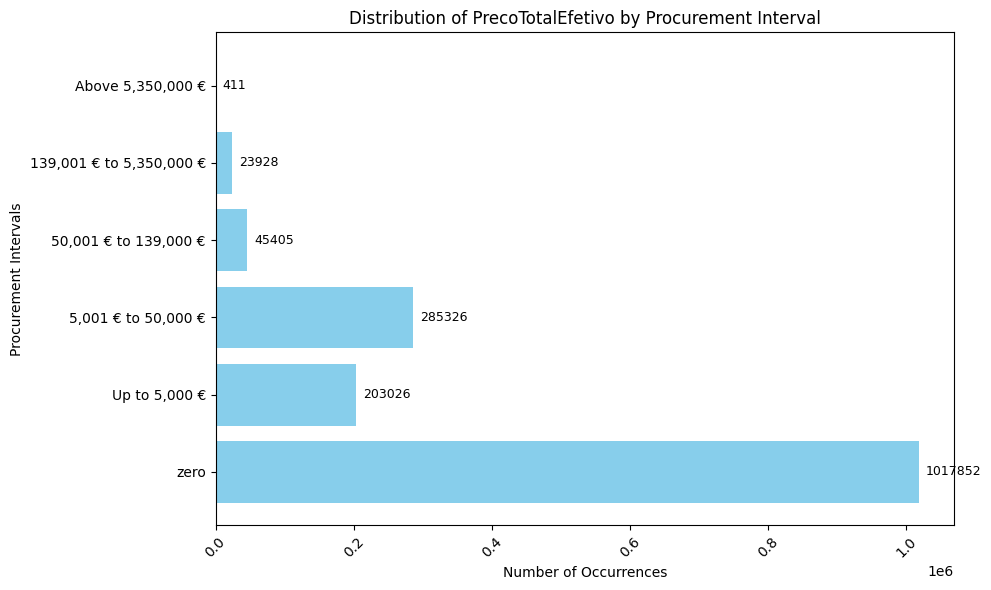

In [377]:
plot_horizontal_bar(
    count_by_interval,
    title="Distribution of PrecoTotalEfetivo by Procurement Interval",
    xlabel="Number of Occurrences",
    ylabel="Procurement Intervals"
)

# regime (object)

In [378]:
count_null_and_empty(df_geral, 'regime')

Null (NaN) values: 0 (0.00%)
Empty string values: 52 (0.00%)


In [379]:
pd.set_option('display.max_colwidth', None)
print(df_geral['regime'].head(20))

0     Código dos Contratos Públicos (DL 18/2008)
1     Código dos Contratos Públicos (DL 18/2008)
2     Código dos Contratos Públicos (DL 18/2008)
3     Código dos Contratos Públicos (DL 18/2008)
4     Código dos Contratos Públicos (DL 18/2008)
5     Código dos Contratos Públicos (DL 18/2008)
6     Código dos Contratos Públicos (DL 18/2008)
7     Código dos Contratos Públicos (DL 18/2008)
8     Código dos Contratos Públicos (DL 18/2008)
9     Código dos Contratos Públicos (DL 18/2008)
10    Código dos Contratos Públicos (DL 18/2008)
11    Código dos Contratos Públicos (DL 18/2008)
12    Código dos Contratos Públicos (DL 18/2008)
13    Código dos Contratos Públicos (DL 18/2008)
14    Código dos Contratos Públicos (DL 18/2008)
15    Código dos Contratos Públicos (DL 18/2008)
16    Código dos Contratos Públicos (DL 18/2008)
17    Código dos Contratos Públicos (DL 18/2008)
18    Código dos Contratos Públicos (DL 18/2008)
19    Código dos Contratos Públicos (DL 18/2008)
Name: regime, dtype:

In [380]:
print(df_geral['regime'].tail(20))

1575971                                                 DLR n.º 27/2015/A, de 29.12
1575972                                                 DLR n.º 27/2015/A, de 29.12
1575973    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05
1575974    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05
1575975    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05
1575976    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05
1575977    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05
1575978    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05
1575979    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05
1575980    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05
1575981    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05
1575982    Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, d

In [381]:
print_top_n(df_geral,'regime',10)

Top 10 most frequent values for 'regime':
regime
Código dos Contratos Públicos ( DL 111-B/2017 )                                                                              702369
Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05                                                     376716
Código dos Contratos Públicos (DL 18/2008)                                                                                   365482
Decreto-Lei n.º 10-A/2020, de 13.03                                                                                           46582
Código dos Contratos Públicos (DL 111-B/2017 ) e DLR nº 34/2008/M, de 14.08 (DLR n.º 6/2018/M)                                28462
Código dos Contratos Públicos (DL 111-B/2017) e Lei n.º 30/2021, de 21.05 e DLR nº 34/2008/M, de 14.08 (DLR n.º 6/2018/M)     14154
Código dos Contratos Públicos e DLR nº 34/2008/M, de 14.08                                                                    11126
DLR n.º 27/2015/A, de 29.12

In [382]:
print_bottom_n(df_geral,'regime',10)

Bottom 10 least frequent values for 'regime':
regime
DLR nº 34/2008/M, de 14.08 (DLR n.º 6/2018/M)        1
RCM n.º 38-B/2020, de 19.05                          1
DL nº 29-A/2011, de 01.03                            1
DL nº41/2008, de 10.03                               1
DL n.º 59-A/2024, de 27.09                           2
DL nº 48/2008, de 13.03 e DL nº 31/2009, de 04.02    2
DL nº 52/2014, de 07.04                              3
DLR n.º 34/2008/A, de 28.07                          3
DL n.º 53/2022, de 12.08                             3
DL nº 41/2007, de 21.02 e DL nº 25/2008, de 20.02    3
Name: count, dtype: int64


In [383]:
df_geral['regime'] = df_geral['regime'].astype("string")

# justifNReducEscrContrato (object)

In [384]:
count_null_and_empty(df_geral, 'justifNReducEscrContrato')

Null (NaN) values: 1095862 (69.53%)
Empty string values: 0 (0.00%)


In [385]:
pd.set_option('display.max_colwidth', None)
print(df_geral['justifNReducEscrContrato'].head(20))

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
Name: justifNReducEscrContrato, dtype: object


In [386]:
print(df_geral['justifNReducEscrContrato'].tail(20))

1575971                                                                                                                                                                                                                None
1575972                                                                                                                                                                                                                None
1575973                                                                                                                                                                                                                None
1575974                                                                                                                                                                                                                None
1575975                                                                                                                 

In [387]:
print_top_n(df_geral,'justifNReducEscrContrato',10)

Top 10 most frequent values for 'justifNReducEscrContrato':
justifNReducEscrContrato
[Artigo 95.º, n.º 1, a), contrato de locação ou de aquisição de bens móveis ou de aquisição de serviços cujo preço contratual não excede 10.000,00 € e para Região Autónoma da Madeira um coeficiente de 1,35 €]       265378
[Artigo 95.º, n.º 1, b), locação ou de aquisição de bens móveis ou aquisição de serviços ao abrigo de um contrato público de aprovisionamento]                                                                          97636
[Artigo 95.º, n.º 1, c), locação ou aquisição de bens móveis ou de serviços nos termos das alíneas i),ii),iii),cumulativamente]                                                                                         74818
[Artigo 95.º, n.º 2, c), por motivos de urgência imperiosa resultante de acontecimentos imprevisíveis pela entidade, é necessário dar imediata execução ao contrato]                                                    20606
[Artigo 41.º do DLR n.º 27/

In [388]:
print_bottom_n(df_geral,'justifNReducEscrContrato',10)

Bottom 10 least frequent values for 'justifNReducEscrContrato':
justifNReducEscrContrato
[Artigo 11.º nº 1 – Contratação excluída setores especiais, Artigo 95.º, n.º 1, b), locação ou de aquisição de bens móveis ou aquisição de serviços ao abrigo de um contrato público de aprovisionamento]                                                                                                                                                                                                                              1
[Artigo 95.º, n.º 2, c), por motivos de urgência imperiosa resultante de acontecimentos imprevisíveis pela entidade, é necessário dar imediata execução ao contrato, Artigo 95.º, n.º 2, a), a segurança pública interna ou externa justifica-o]                                                                                                                                                                                       1
[Artigo 11.º nº 1 – Contratação excluída setores especiais, A

In [389]:
df_geral['justifNReducEscrContrato'] = df_geral['justifNReducEscrContrato'].astype("string")

# tipoFimContrato (object)

In [390]:
count_null_and_empty(df_geral, 'tipoFimContrato')

Null (NaN) values: 0 (0.00%)
Empty string values: 1050768 (66.67%)


In [391]:
pd.set_option('display.max_colwidth', None)
print(df_geral['tipoFimContrato'].head(20))

0     O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil
1     O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil
2     O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil
3                                                                                                                  Resolução do Contrato
4     O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil
5     O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil
6     O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil
7     O cumprimento, a impossibilidade de

In [392]:
print(df_geral['tipoFimContrato'].tail(20))

1575971    O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil
1575972    O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil
1575973                                                                                                                                      
1575974                                                                                                                                      
1575975                                                                                                                                      
1575976                                                                                                                                      
1575977                                                                                                                                      
157597

In [393]:
print_top_n(df_geral,"tipoFimContrato",30)

Top 30 most frequent values for 'tipoFimContrato':
tipoFimContrato
                                                                                                                                      1050768
O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil     512180
Resolução do Contrato                                                                                                                    8463
Revogação do Contrato                                                                                                                    3863
Anulado ou Declarado Nulo                                                                                                                 539
Contrato Anulado, Declarado Nulo ou Objecto de Recusa de Visto                                                                            158
Objeto de recusa de visto do Tribunal de Contas                                  

In [394]:
# Converting to string
df_geral['tipoFimContrato'] = df_geral['tipoFimContrato'].astype("string")

# CritMateriais (object)

In [395]:
count_null_and_empty(df_geral, 'CritMateriais')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [396]:
pd.set_option('display.max_colwidth', None)
print(df_geral['CritMateriais'].head(10))

0    NÃ£o
1    NÃ£o
2    NÃ£o
3    NÃ£o
4    NÃ£o
5    NÃ£o
6    NÃ£o
7    NÃ£o
8    NÃ£o
9    NÃ£o
Name: CritMateriais, dtype: object


In [397]:
print_top_n(df_geral,"CritMateriais",20)

Top 20 most frequent values for 'CritMateriais':
CritMateriais
NÃ£o    1320699
Sim      255292
Name: count, dtype: int64


In [398]:
df_geral['CritMateriais'] = df_geral['CritMateriais'].replace('NÃ£o', 'Nao')

In [399]:
print_top_n(df_geral,"CritMateriais",20)

Top 20 most frequent values for 'CritMateriais':
CritMateriais
Nao    1320699
Sim     255292
Name: count, dtype: int64


In [400]:
bool_map = {'Sim': True, 'Nao': False}
df_geral['CritMateriais'] = df_geral['CritMateriais'].map(bool_map).astype('boolean')


In [401]:
print_top_n(df_geral,"CritMateriais",20)

Top 20 most frequent values for 'CritMateriais':
CritMateriais
False    1320699
True      255292
Name: count, dtype: Int64


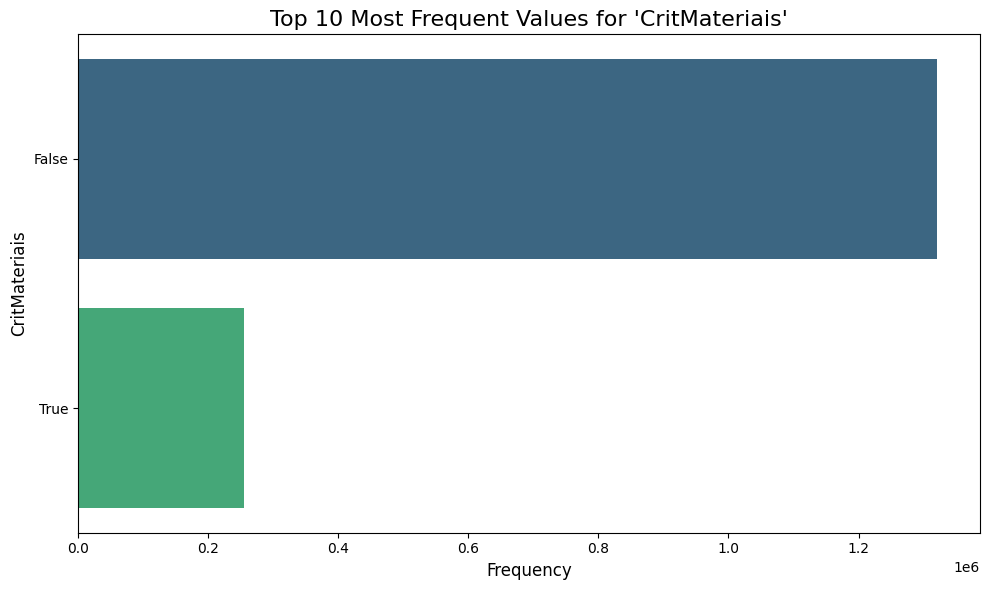

In [402]:
plot_top_n_numeric(df_geral,"CritMateriais",10)

# concorrentes (object)

In [403]:
count_null_and_empty(df_geral, 'concorrentes')

Null (NaN) values: 960841 (60.97%)
Empty string values: 0 (0.00%)


In [404]:
pd.set_option('display.max_colwidth', None)
print(df_geral['concorrentes'].head(20))

0                                                                                                                        None
1                                                                                                                        None
2                                                                                                                        None
3                                                                                                                        None
4                                                                                                                        None
5                                                                                                                        None
6                                                                                                                        None
7                                                                                                                     

In [405]:
print(df_geral['concorrentes'].tail(20))

1575971                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [--DENISE BEATRIZ RODRIGUES ANDRADE]
1575972                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [406]:
df_geral['concorrentes_string'] = df_geral['concorrentes'].astype("string")

In [407]:
print(df_geral['concorrentes_string'].head(20))

0                                                                                                                            <NA>
1                                                                                                                            <NA>
2                                                                                                                            <NA>
3                                                                                                                            <NA>
4                                                                                                                            <NA>
5                                                                                                                            <NA>
6                                                                                                                            <NA>
7                                                                                         

In [408]:
filtered_df= df_geral[df_geral['concorrentes_string'].str.contains('500886113-Raso - Viagens e Turismo', na=False)]
print(filtered_df["concorrentes_string"])


2958                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ['508314925-ELOT - Agência de Viagens e Turismo, SA'
 '501061126-TOP ATLANTICO - Viagens e Turismo, SA'
 '501343237-Escalatur - Viagens e Turismo, Lda.' '501058400-TUI PORTUGAL'
 '50029

In [409]:
print_top_n_list(df_geral,"concorrentes",20)

Top 20 most frequent values for 'concorrentes':
concorrentes
502248793-MYLAN, LDA.                                           15311
506985261-SANDOZ FARMACÊUTICA, LDA.                              8281
501505334-FARMOZ - SOCIEDADE TÉCNICO MEDICINAL S.A.              7513
504293753-FRESENIUS KABI PHARMA PORTUGAL                         7261
507045491-TEVA PHARMA - PRODUTOS FARMACEUTICOS,LDA               7161
502266791-HIKMA FARMACÊUTICA (PORTUGAL) SA.                      7097
505792362-OVERPHARMA - PRODUTOS MEDICOS E FARM.                  7070
500162166-LAB. PFIZER, LDA.                                      6656
508107997-Generis Farmacêutica, S.A.                             6236
505792362-Overpharma, Produtos Médicos e Farmacêuticos, Lda.     6184
508107997-GENERIS - FARMACEUTICA, S.A.                           6089
502248793-MYLAN, LDA                                             5322
508622263-ACCORD HEALTHCARE , UNIPESSOAL LDA                     5018
500191360-MERCK SHARP DOHME  

In [410]:
def extract_nipc_and_description_from_list_or_str(entries):
    nipcs = []
    descs = []
    
    # Normalize input to list of strings
    if isinstance(entries, (list, np.ndarray)):
        entries_list = entries
    elif isinstance(entries, str):
        # If string looks like list (starts and ends with brackets)
        if entries.startswith('[') and entries.endswith(']'):
            content = entries[1:-1].strip()
            # Split entries on pattern: comma that follows a 9-digit number and dash
            # Use regex to split on commas **only if** preceded by a pattern like 'digits -'
            # Because commas can appear inside descriptions, naive split(', ') won't work
            # We'll find all occurrences of the pattern '9digits - description'
            pattern = r'\d{9}\s*-\s*[^,]+(?:, [^,]+)*'
            entries_list = re.findall(pattern, content)
        else:
            # Single string entry (not a list)
            entries_list = [entries]
    else:
        return pd.Series([None, None])
    
    for entry in entries_list:
        entry = re.sub(r'[–—−]', '-', entry)  # Normalize dashes
        match = re.match(r'^\s*(\d{9})\s*-\s*(.+)', entry)
        if match:
            nipcs.append(match.group(1))
            descs.append(match.group(2).strip())
        else:
            nipcs.append(None)
            descs.append(None)
    
    # Always return lists (or None if empty)
    return pd.Series([nipcs if nipcs else None, descs if descs else None])

In [411]:
df_geral[['concorrentes_nipc', 'concorrentes_description']] = df_geral['concorrentes'].apply(extract_nipc_and_description_from_list_or_str)

In [412]:
display(df_geral[['concorrentes', 'concorrentes_nipc', 'concorrentes_description']].head(20))

,concorrentes,concorrentes_nipc,concorrentes_description
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None
5,None,None,None
6,None,None,None
7,None,None,None
8,None,None,None
9,"[502212900-XIX - CONSTRUÇÃO, PROJECTOS E GESTÃO, LDA., 501748407-LUÍS FRAZÃO – CONSTRUÇÃO CIVIL E OBRAS PÚBLICAS, S.A.]","[502212900, 501748407]","[XIX - CONSTRUÇÃO, PROJECTOS E GESTÃO, LDA., LUÍS FRAZÃO - CONSTRUÇÃO CIVIL E OBRAS PÚBLICAS, S.A.]"


In [413]:
# Filter rows with nulls in either column
missing_rows = df_geral[df_geral['concorrentes_nipc'].isna() | df_geral['concorrentes_description'].isna()]
# Display the first 20 rows
display(missing_rows[['concorrentes', 'concorrentes_nipc', 'concorrentes_description']].head(10))

,concorrentes,concorrentes_nipc,concorrentes_description
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None
5,None,None,None
6,None,None,None
7,None,None,None
8,None,None,None
10,None,None,None


In [414]:
filtered_df= df_geral[df_geral['concorrentes_string'].str.contains('500886113-Raso - Viagens e Turismo', na=False)]
print(filtered_df[['concorrentes', 'concorrentes_nipc', 'concorrentes_description']])

In [415]:
count_null_and_empty(df_geral, 'concorrentes_description')

Null (NaN) values: 960841 (60.97%)
Empty string values: 0 (0.00%)


In [416]:
print_top_n_list(df_geral,"concorrentes_description",10)

Top 10 most frequent values for 'concorrentes_description':
concorrentes_description
MYLAN, LDA.                                  15313
SANDOZ FARMACÊUTICA, LDA.                     8347
GENERIS - FARMACEUTICA, S.A.                  8048
FARMOZ - SOCIEDADE TÉCNICO MEDICINAL S.A.     7513
FRESENIUS KABI PHARMA PORTUGAL                7306
OVERPHARMA - PRODUTOS MEDICOS E FARM.         7186
TEVA PHARMA - PRODUTOS FARMACEUTICOS,LDA      7172
HIKMA FARMACÊUTICA (PORTUGAL) SA.             7143
LAB. PFIZER, LDA.                             6684
Generis Farmacêutica, S.A.                    6237
Name: count, dtype: int64


In [417]:
print_bottom_n_list(df_geral,"concorrentes_description",10)

Bottom 10 least frequent values for 'concorrentes_description':
concorrentes_description
Omnilectro-Equipamentos Electrónicos, SA              1
REGRA BINÁRIA LDA.                                    1
PORTUGAL DOS PEQUENINOS-EXEC.DE MAQUETAS,LDA          1
GM2E                                                  1
Gestifatura, S.A.                                     1
Auto Viação do Tâmega, Ldª                            1
IPX - Informática e Serviços Lda                      1
SPECULUM, ARTIGOS MÉDICOS SA                          1
Rectas Paralelas - Arquitetura e Gestão, Limitada     1
JOÃO GIGA - SERVIÇOS DE ENGENHARIA UNIPESSOAL, LDA    1
Name: count, dtype: int64


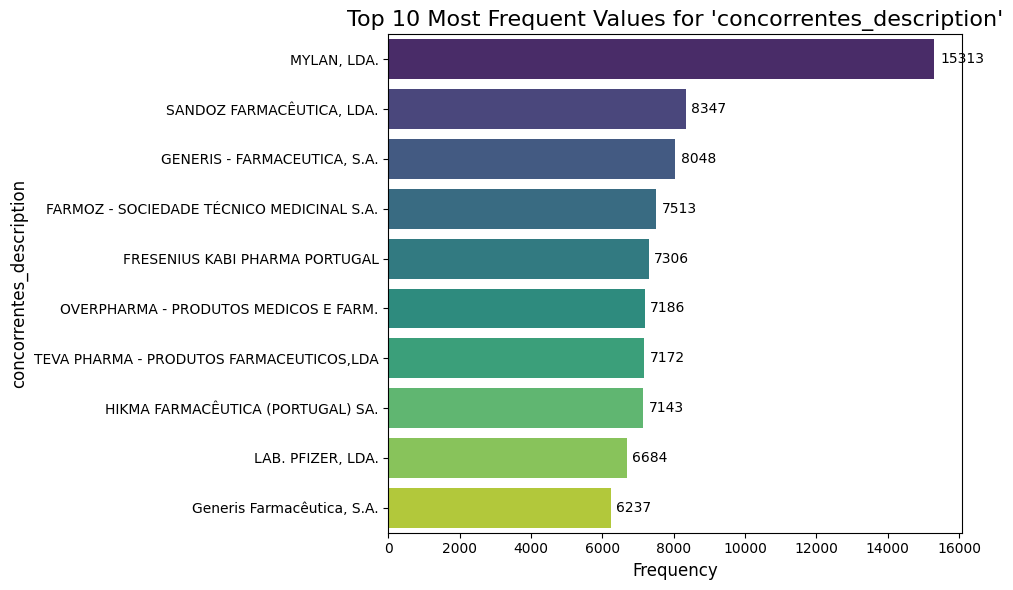

In [418]:
plot_top_n_list(df_geral,"concorrentes_description",10)

In [419]:
count_null_and_empty(df_geral, 'concorrentes_nipc')

Null (NaN) values: 960841 (60.97%)
Empty string values: 0 (0.00%)


In [420]:
print_top_n_list(df_geral,"concorrentes_nipc",10)

Top 10 most frequent values for 'concorrentes_nipc':
concorrentes_nipc
508107997    36985
505792362    33948
502248793    31192
501506543    29921
506985261    25971
508622263    25015
504293753    24392
502266791    23999
501505334    23862
507045491    20332
Name: count, dtype: int64


In [421]:
print_bottom_n_list(df_geral,"concorrentes_nipc",10)

Bottom 10 least frequent values for 'concorrentes_nipc':
concorrentes_nipc
513885447    1
516406078    1
513025979    1
516793713    1
220233314    1
222992530    1
513038418    1
517822598    1
515957585    1
515266507    1
Name: count, dtype: int64


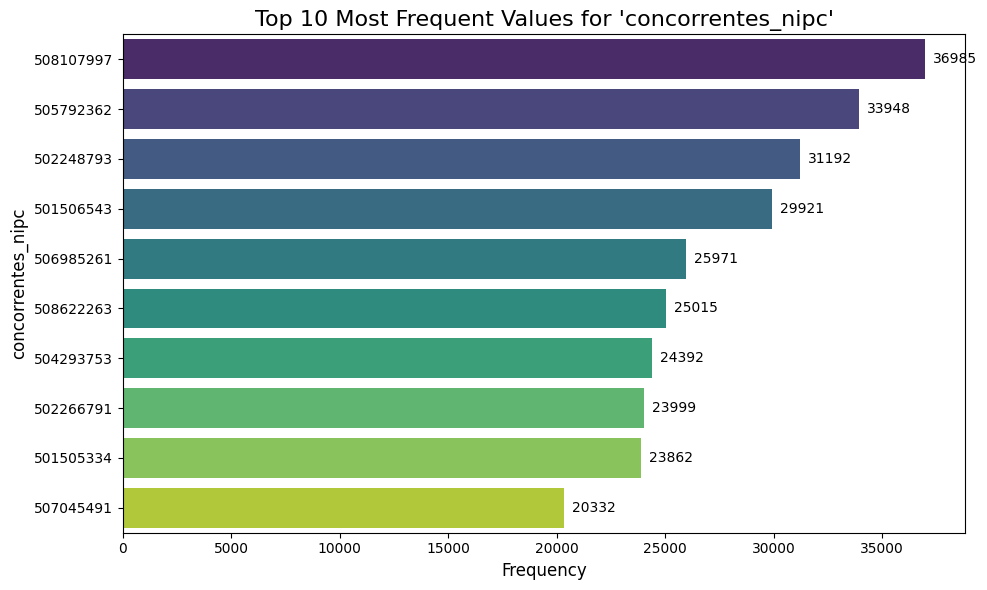

In [422]:
plot_top_n_list(df_geral,"concorrentes_nipc",10)

# linkPecasProc (object)

In [423]:
count_null_and_empty(df_geral, 'linkPecasProc')

Null (NaN) values: 0 (0.00%)
Empty string values: 1164464 (73.89%)


In [424]:
pd.set_option('display.max_colwidth', None)
print(df_geral['linkPecasProc'].head(10))

0    
1    
2    
3    
4    
5    
6    
7    
8    
9    
Name: linkPecasProc, dtype: object


In [425]:
print(df_geral['linkPecasProc'].tail(10))

1575981    https://community.vortal.biz/Public/public-tender-documents/bXY4VVRXUis5U0ljd0Fka1NLelhGTUVDOC9TaEp0d1BnZGxIVTZSSStTRXoralhISUFaaC9KY0hTZUtRMEIyblcvcU5BUTdOdVVnaytLaGY2OHpuRGc9PUtlXyUo
1575982    https://community.vortal.biz/Public/public-tender-documents/dVBFM3hMeTVFMWNzZnREbmU4emVmMHVKZEdqejg1VDE2ZEpGUW9ReWRpV3ZwS01OZmRBL3lzdlFaOG9xTjRyY2JLajU5eGZsemsxbTFYOXM3a1RlSmc9PU5Tb21W
1575983    https://community.vortal.biz/Public/public-tender-documents/bXY4VVRXUis5U0ljd0Fka1NLelhGTUVDOC9TaEp0d1BnZGxIVTZSSStTRXoralhISUFaaC9KY0hTZUtRMEIyblcvcU5BUTdOdVVnaytLaGY2OHpuRGc9PUtlXyUo
1575984    https://community.vortal.biz/Public/public-tender-documents/bXY4VVRXUis5U0ljd0Fka1NLelhGTUVDOC9TaEp0d1BnZGxIVTZSSStTRXoralhISUFaaC9KY0hTZUtRMEIyblcvcU5BUTdOdVVnaytLaGY2OHpuRGc9PUtlXyUo
1575985    https://community.vortal.biz/Public/public-tender-documents/bXY4VVRXUis5U0ljd0Fka1NLelhGTUVDOC9TaEp0d1BnZGxIVTZSSStTRXoralhISUFaaC9KY0hTZUtRMEIyblcvcU5BUTdOdVVnaytLaGY2OHpuRGc9PUtlXyUo
1575986             

In [426]:
print_top_n(df_geral,'linkPecasProc',10)

Top 10 most frequent values for 'linkPecasProc':
linkPecasProc
                                                                                                                                       1164464
https://dgaj.justica.gov.pt/                                                                                                              1312
https://www.base.gov.pt/base4                                                                                                              882
http://www.chualgarve.min-saude.pt                                                                                                         736
https://portal-chsj.min-saude.pt/                                                                                                          554
https://vortal.biz                                                                                                                         547
https://community.vortal.biz                                                   

In [427]:
print_bottom_n(df_geral,'linkPecasProc',10)

Bottom 10 least frequent values for 'linkPecasProc':
linkPecasProc
https://www.anogov.com/infraestruturasdeportugal-ip/faces/app/pap/listaDocs.jsp?papId=6861                   1
https://community.vortal.biz/PRODPublic/Tendering/OpportunityDetail/Index?noticeUID=PT1.NTC.2961077          1
https://www.acingov.pt/acingovprod/2/index.php/zonaPublica/zona_publica_c/donwloadProcedurePiece/NDA4MjU0    1
https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NzQ5Njg1              1
https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NzkzNjUw              1
https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NzkwMDE2              1
https://gov.saphety.com/bizgov/econcursos/procedurePiecesExport_194728!exportProcedure.action                1
https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NzkxNzY4              1
https://community.vortal.biz/PRODPublic/Tende

In [428]:
df_geral['linkPecasProc'] = df_geral['linkPecasProc'].astype("string")

# Observacoes (object)

In [429]:
count_null_and_empty(df_geral, 'Observacoes')

Null (NaN) values: 0 (0.00%)
Empty string values: 1471626 (93.38%)


In [430]:
pd.set_option('display.max_colwidth', None)
print(df_geral['Observacoes'].head(10))

0    
1    
2    
3    
4    
5    
6    
7    
8    
9    
Name: Observacoes, dtype: object


In [431]:
print(df_geral['Observacoes'].tail(10))

1575981    
1575982    
1575983    
1575984    
1575985    
1575986    
1575987    
1575988    
1575989    
1575990    
Name: Observacoes, dtype: object


In [432]:
print_top_n(df_geral,'Observacoes',10)

Top 10 most frequent values for 'Observacoes':
Observacoes
                 1469528
N/A                10785
.                   8036
-                   7132
NA                  6185
n/a                 4915
Não aplicável       3250
0                   3134
na                  1927
n.a.                1728
Name: count, dtype: int64


In [433]:
print_bottom_n(df_geral,'Observacoes',10)

Bottom 10 least frequent values for 'Observacoes':
Observacoes
PAQ.145/2014-Prestação de serviços de " Rede de Cidades a candiadtar ao Programa URBACT III"                                                                                                                                            1
Assunção de Compromissos Plurianuais - INF 137359/2024/L-EFSA                                                                                                                                                                           1
Assunção de Compromissos Plurianuais - INF 114039/2024/L-EFSA                                                                                                                                                                           1
 Assunção de Compromissos Plurianuais - INF 54413/2024/L-EFSA                                                                                                                                                                           1
C

In [434]:
df_geral['Observacoes'] = df_geral['Observacoes'].astype("string")

# ContratEcologico (object)

In [435]:
count_null_and_empty(df_geral, 'ContratEcologico')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [436]:
pd.set_option('display.max_colwidth', None)
print(df_geral['ContratEcologico'].head(10))

0    NÃ£o
1    NÃ£o
2    NÃ£o
3    NÃ£o
4    NÃ£o
5    NÃ£o
6    NÃ£o
7    NÃ£o
8    NÃ£o
9    NÃ£o
Name: ContratEcologico, dtype: object


In [437]:
print_top_n(df_geral,"ContratEcologico",20)

Top 20 most frequent values for 'ContratEcologico':
ContratEcologico
NÃ£o    1531042
Sim       44949
Name: count, dtype: int64


In [438]:
df_geral['ContratEcologico'] = df_geral['ContratEcologico'].replace('NÃ£o', 'Nao')

In [439]:
print_top_n(df_geral,"ContratEcologico",20)

Top 20 most frequent values for 'ContratEcologico':
ContratEcologico
Nao    1531042
Sim      44949
Name: count, dtype: int64


In [440]:
bool_map = {'Sim': True, 'Nao': False}
df_geral['ContratEcologico'] = df_geral['ContratEcologico'].map(bool_map).astype('boolean')


In [441]:
print_top_n(df_geral,"ContratEcologico",20)

Top 20 most frequent values for 'ContratEcologico':
ContratEcologico
False    1531042
True       44949
Name: count, dtype: Int64


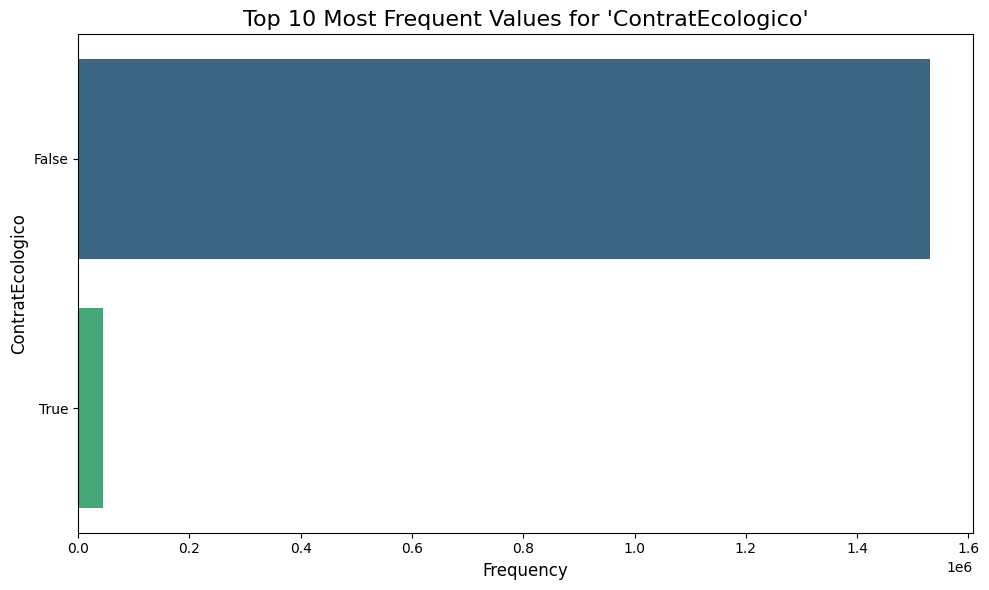

In [442]:
plot_top_n_numeric(df_geral,"ContratEcologico",10)

# Ano (int64)

In [443]:
count_null_and_empty(df_geral, 'Ano')

Null (NaN) values: 0 (0.00%)
Empty string values: 0 (0.00%)


In [444]:
pd.set_option('display.max_colwidth', None)
print(df_geral['Ano'].head(10))

0    2015
1    2015
2    2015
3    2015
4    2015
5    2015
6    2015
7    2015
8    2015
9    2015
Name: Ano, dtype: int64


In [445]:
print(df_geral['Ano'].tail(10))

1575981    2024
1575982    2024
1575983    2024
1575984    2024
1575985    2024
1575986    2024
1575987    2024
1575988    2024
1575989    2024
1575990    2024
Name: Ano, dtype: int64


In [446]:
print_top_n(df_geral,"Ano",20)

Top 20 most frequent values for 'Ano':
Ano
2024    219656
2023    191548
2021    187169
2020    176412
2022    175928
2019    145490
2017    128604
2018    127933
2016    115065
2015    108186
Name: count, dtype: int64


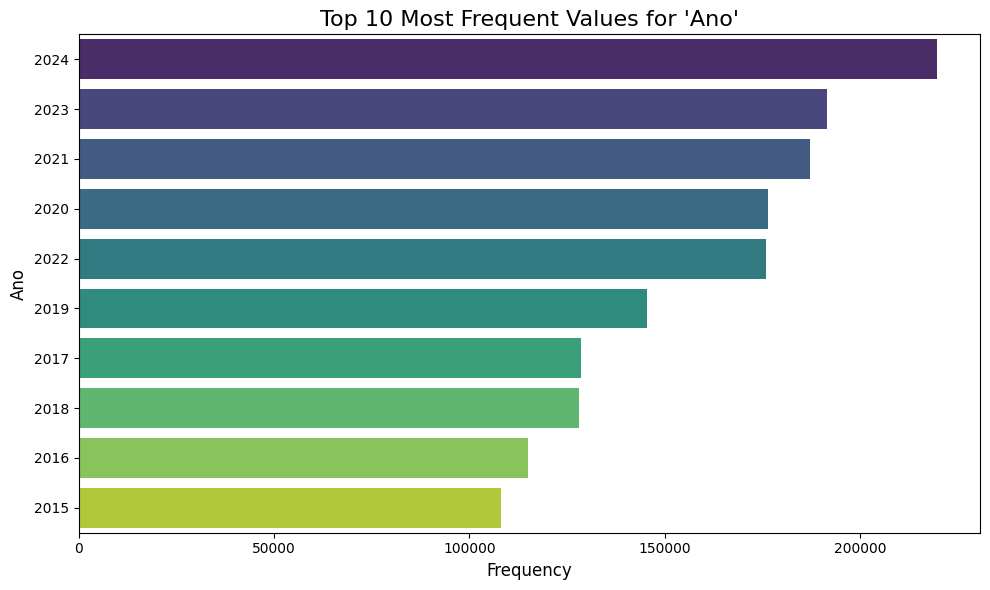

In [447]:
plot_top_n_numeric(df_geral,"Ano",10)

# fundamentAjusteDireto (object)

In [448]:
count_null_and_empty(df_geral, 'fundamentAjusteDireto')

Null (NaN) values: 0 (0.00%)
Empty string values: 978985 (62.12%)


In [449]:
pd.set_option('display.max_colwidth', None)
print(df_geral['fundamentAjusteDireto'].head(10))

0    
1    
2    
3    
4    
5    
6    
7    
8    
9    
Name: fundamentAjusteDireto, dtype: object


In [450]:
print(df_geral['fundamentAjusteDireto'].tail(10))

1575981    
1575982    
1575983    
1575984    
1575985    
1575986    
1575987    
1575988    
1575989    
1575990    
Name: fundamentAjusteDireto, dtype: object


In [451]:
print_top_n(df_geral,'fundamentAjusteDireto',10)

Top 10 most frequent values for 'fundamentAjusteDireto':
fundamentAjusteDireto
                                 978985
ausência de recursos próprios    574637
outros                            22369
Name: count, dtype: int64


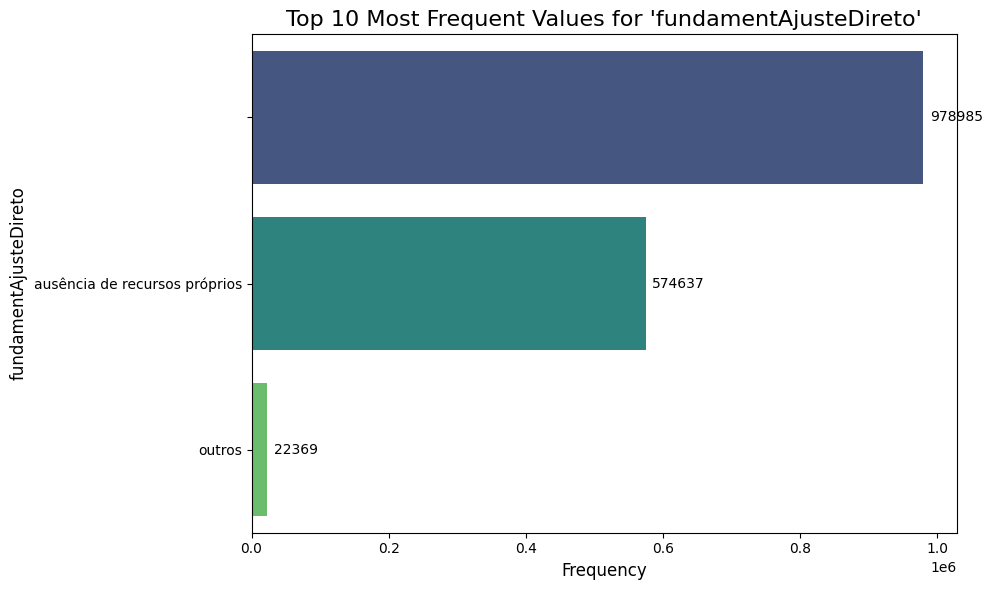

In [452]:
plot_top_n(df_geral,"fundamentAjusteDireto",10)

In [453]:
df_geral['fundamentAjusteDireto'] = df_geral['fundamentAjusteDireto'].astype("string")

# Print squema

In [454]:
df_geral.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575991 entries, 0 to 1575990
Data columns (total 59 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   idcontrato                     1575991 non-null  int64         
 1   nAnuncio                       1575991 non-null  string        
 2   TipoAnuncio                    1575991 non-null  string        
 3   idINCM                         180352 non-null   Int64         
 4   tipoContrato                   1575963 non-null  object        
 5   idprocedimento                 1575991 non-null  int64         
 6   tipoprocedimento               1575991 non-null  string        
 7   objectoContrato                1575991 non-null  string        
 8   descContrato                   1575991 non-null  string        
 9   adjudicante                    1575973 non-null  object        
 10  adjudicatarios                 1574042 non-null  objec

# Export clean dataset to parquet by year of Ano de Celebração do Contrato 

In [455]:
output_folder = '19_DataAfterCleaning'
os.makedirs(output_folder, exist_ok=True)

for year in range(2015, 2025):
    df_year = df_geral[df_geral['Ano'] == year]
    
    # Caminho para Parquet
    parquet_filename = f'csv_resultados_{year}.parquet'
    parquet_filepath = os.path.join(output_folder, parquet_filename)
    df_year.to_parquet(parquet_filepath, index=False)
    
    # Caminho para CSV
    csv_filename = f'csv_resultados_{year}.csv'
    csv_filepath = os.path.join(output_folder, csv_filename)
    df_year.to_csv(csv_filepath, index=False, encoding='utf-8-sig')

    print(f'Saved: {parquet_filepath} & {csv_filepath} ({len(df_year)} rows)')

Saved: 19_DataAfterCleaning\csv_resultados_2015.parquet & 19_DataAfterCleaning\csv_resultados_2015.csv (108186 rows)
Saved: 19_DataAfterCleaning\csv_resultados_2016.parquet & 19_DataAfterCleaning\csv_resultados_2016.csv (115065 rows)
Saved: 19_DataAfterCleaning\csv_resultados_2017.parquet & 19_DataAfterCleaning\csv_resultados_2017.csv (128604 rows)
Saved: 19_DataAfterCleaning\csv_resultados_2018.parquet & 19_DataAfterCleaning\csv_resultados_2018.csv (127933 rows)
Saved: 19_DataAfterCleaning\csv_resultados_2019.parquet & 19_DataAfterCleaning\csv_resultados_2019.csv (145490 rows)
Saved: 19_DataAfterCleaning\csv_resultados_2020.parquet & 19_DataAfterCleaning\csv_resultados_2020.csv (176412 rows)
Saved: 19_DataAfterCleaning\csv_resultados_2021.parquet & 19_DataAfterCleaning\csv_resultados_2021.csv (187169 rows)
Saved: 19_DataAfterCleaning\csv_resultados_2022.parquet & 19_DataAfterCleaning\csv_resultados_2022.csv (175928 rows)
Saved: 19_DataAfterCleaning\csv_resultados_2023.parquet & 19_Dat